# INFO213: Data Science Programming II
## Final Project
## Kevin Shi, Rithvik Sukumaran

# Final Project Part 1: Data Preprocessing & EDA

## About the Dataset
The Behavioral Risk Factor Surveillance System (BRFSS) collects comprehensive health-related data from U.S. residents through telephone surveys conducted by various state health departments in collaboration with the Centers for Disease Control and Prevention (CDC). This Cardiovascular Diseases Risk Prediction Dataset contains 19 variables that specifically relate to lifestyle factors that have commonly been associated with an increased risk of various cardiovascular diseases. The purpose of this dataset is not only to monitor and track health-related risk behaviors among the U.S. adult population but is also to analyze contributing factors to chronic health conditions such as cardiovascular diseases (CVDs), diabetes, obesity, hypertension, and other significant health issues present in the population. For the BRFSS, this dataset serves their purpose of providing a comprehensive knowledge of the health status and behaviors of the U.S. population, which is vital for them when developing effective public health policies, guiding healthcare interventions, and ultimately improving the overall health and well-being of the nation. By analyzing the dataset for my purposes, however, we can not only pinpoint high-risk populations, identify trends, and formulate health suggestions, but we can also use machine learning models to predict the risk of CVDs based on personal lifestyle factors.

To define and measure the outcomes from the dataset, I will first perform an Exploratory Data Analysis to check the data quality, discover patterns and trends, understand the distribution of variables, formulate hypotheses, and communicate my findings. For the EDA, I will specifically identify and explain interesting relationships between features and the class I am trying to predict (heart disease). I will then select appropriate target variables and define the metrics or criteria used to assess the performance of predictive models or evaluate associations in statistical analyses. For predictive modeling, since the dataset has labeled data (instances with known CVD status), the outcome variable of CVD absence or presence is readily available for model training and evaluation. The outcome of these models can be measured by interpreting the model's coefficients or feature importance to understand CVD prediction based on lifestyle factors. For statistical analysis, I can conduct hypothesis testing or regression analyses to assess the association between lifestyle factors and CVDs risk. The outcome of this analysis can be measured using Analysis of Variance to find common means of different variables or regression analysis by looking at regression equations and their error values.

To measure the effectiveness of a good prediction algorithm and other supervised learning approaches, one thing we can look at is accuracy, which is the proportion of correctly predicted instances over the total number of instances. A second measure we can look at is precision, which measures the proportion of true positives over all the predicted positive cases. A third measure we can look at is recall, which measures the proportion of true positives over all actual positive cases and true negatives over all actual negative cases. A fourth measure we can use is F1 score, which is the harmonic mean of precision and recall. Furthermore, to visualize the type 1 and type 2 errors, we can utilize a confusion matrix to define the performance of a classification algorithm. As for measuring the effectiveness of a clustering algorithm, such as the KMeans Clustering algorithm, we can likewise look at accuracy, precision, recall, and F1 score. However, we can also look at metrics such as Silhouette Score, which is a measure ranging from -1 to 1 that measures of how well each data point fits into its cluster and how different the clusters are from each other; scores closer to 1 would signify better-defined clusters and score closer to -1 would signify worse-defined clusters while scores of 0 would signify overlapping clusters. Another metric we can look at for clustering algorithms is the Davies-Bouldin Index, which measures the average similarity between each cluster and its most alike cluster, where lower values indicate better clustering. Other additional measures for unsupervised learning are Adjusted Rand Index (ARI), Normalized Mutual Information (NMI), and Homogeneity, Completeness, and V-measure.

## Data Preprocessing

There are 308854 rows and 19 columns (variables) in this dataset. Of the 19 variables, 7 are numerical, 9 are categorical, and 3 are ordinal.


1.  **Column 1: General_Health**

*   Description: "Would you say that in general your health is..."
*   Variable Type: ordinal
*   Values: ['Poor', 'Very Good', 'Good', 'Fair', 'Excellent'], dtype=object

2.  **Column 2: Checkup**


*   Description: "About how long has it been since you last visited a doctor for a routine checkup?"
*   Variable Type: ordinal
*   Values: ['Within the past 2 years', 'Within the past year',
       '5 or more years ago', 'Within the past 5 years', 'Never'],
      dtype=object


3.  **Column 3: Exercise**


*   Description: "During the past month, other than your regular job, did you participate in any physical activities or exercises such as running, calisthenics, golf, gardening, or walking for exercise?"
*   Variable Type: categorical
*   Values: ['No', 'Yes'], dtype=object


4.   **Column 4: Heart_Disease**


*   Description: "Respondents that reported having coronary heart disease or mycardialinfarction"
*   Variable Type: categorical
*   Values: ['No', 'Yes'], dtype=object


5.   **Column 5: Skin_Cancer**


*   Description: "Respondents that reported having skin cancer"
*   Variable Type: categorical
*   Values: ['No', 'Yes'], dtype=object


6.   **Column 6: Other_Cancer**


*   Description: "Respondents that reported having any other types of cancer"
*   Variable Type: categorical
*   Values: ['No', 'Yes'], dtype=object


7.   **Column 7: Depression**


*   Description: "Respondents that reported having a depressive disorder (including depression, major depression, dysthymia, or minor depression)"
*   Variable Type: categorical
*   Values: ['No', 'Yes'], dtype=object


8.   **Column 8: Diabetes**


*   Description: "Respondents that reported having a diabetes. If yes, what type of diabetes it is/was"
*   Variable Type: categorical
*   Values: ['No', 'Yes', 'No, pre-diabetes or borderline diabetes',
       'Yes, but female told only during pregnancy'], dtype=object


9.   **Column 9: Arthritis**


*   Description: "Respondents that reported having an Arthritis"
*   Variable Type: categorical
*   Values: ['Yes', 'No'], dtype=object


10.   **Column 10: Sex**


*   Description: "Respondent's Gender"
*   Variable Type: categorical
*   Values: ['Female', 'Male'], dtype=object


11.   **Column 11: Age_Category**

*   Variable Type: ordinal
*   Values: ['70-74', '60-64', '75-79', '80+', '65-69', '50-54', '45-49',
       '18-24', '30-34', '55-59', '35-39', '40-44', '25-29'], dtype=object


12.   **Column 12: Height_(cm)**


*   Description: heights in centimeters
*   Variable Type: numerical
*   Values: 99 unique values
*   Min height: 91.0 cm
*   Max height: 241.0 cm


13.   **Column 13: Weight_(kg)**


*   Description: weights in kilograms
*   Variable Type: numerical
*   Values: 525 unique values
*   Min weight: 24.95 kg
*   Max weight: 293.02 kg


14.   **Column 14: BMI**


*   Description: Body Mass Index
*   Variable Type: numerical
*   Values: 3654 unique values
*   Min BMI: 12.02
*   Max BMI: 99.33


15.   **Column 15: Smoking_History**

*   Variable Type: categorical
*   Values: ['Yes', 'No'], dtype=object


16.   **Column 16: Alcohol_Consumption**

*   Description: "Number of consumption in a month"
*   Variable Type: numerical
*   Scale: values between 0 and 30
*   Values: 31 unique values

*For the variables dealing with food consumption, the survey question was "How often did you eat a ___(fruit, vegetable, fried potato)___?" and the answer choices would be an input of the user where the consumption could be per day, per week, or per month. The creator converted the responses per day to month, and responses per week to month. For example, according to the creator of the dataset, "a 128 response would be a representative of a person who consume vegetables at least 4-5 times a day"*

17.   **Column 17: Fruit_Consumption**

*   Variable Type: numerical
*   Scale: values between 0 and 120
*   Values: 77 unique values

18.   **Column 18: Green_Vegetables_Consumption**

*   Variable Type: numerical
*   Scale: values between 0 and 128
*   Values: 75 unique values

19.   **Column 19: FriedPotato_Consumption**

*   Variable Type: numerical
*   Scale: values between 0 and 128
*   Values: 69 unique values


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import files
files.upload()

Saving CVD_cleaned.csv to CVD_cleaned.csv


In [ ]:
cvd_df = pd.read_csv("CVD_cleaned.csv")

In [ ]:
cvd_df.shape

(308854, 19)

In [ ]:
cvd_df.columns

Index(['General_Health', 'Checkup', 'Exercise', 'Heart_Disease', 'Skin_Cancer',
       'Other_Cancer', 'Depression', 'Diabetes', 'Arthritis', 'Sex',
       'Age_Category', 'Height_(cm)', 'Weight_(kg)', 'BMI', 'Smoking_History',
       'Alcohol_Consumption', 'Fruit_Consumption',
       'Green_Vegetables_Consumption', 'FriedPotato_Consumption'],
      dtype='object')

In [ ]:
cvd_df.head()

,General_Health,Checkup,Exercise,Heart_Disease,Skin_Cancer,Other_Cancer,Depression,Diabetes,Arthritis,Sex,Age_Category,Height_(cm),Weight_(kg),BMI,Smoking_History,Alcohol_Consumption,Fruit_Consumption,Green_Vegetables_Consumption,FriedPotato_Consumption
0,Poor,Within the past 2 years,No,No,No,No,No,No,Yes,Female,70-74,150.0,32.66,14.54,Yes,0.0,30.0,16.0,12.0
1,Very Good,Within the past year,No,Yes,No,No,No,Yes,No,Female,70-74,165.0,77.11,28.29,No,0.0,30.0,0.0,4.0
2,Very Good,Within the past year,Yes,No,No,No,No,Yes,No,Female,60-64,163.0,88.45,33.47,No,4.0,12.0,3.0,16.0
3,Poor,Within the past year,Yes,Yes,No,No,No,Yes,No,Male,75-79,180.0,93.44,28.73,No,0.0,30.0,30.0,8.0
4,Good,Within the past year,No,No,No,No,No,No,No,Male,80+,191.0,88.45,24.37,Yes,0.0,8.0,4.0,0.0


In [ ]:
cvd_df.info

<bound method DataFrame.info of        General_Health                  Checkup Exercise Heart_Disease  \
0                Poor  Within the past 2 years       No            No   
1           Very Good     Within the past year       No           Yes   
2           Very Good     Within the past year      Yes            No   
3                Poor     Within the past year      Yes           Yes   
4                Good     Within the past year       No            No   
...               ...                      ...      ...           ...   
308849      Very Good     Within the past year      Yes            No   
308850           Fair  Within the past 5 years      Yes            No   
308851      Very Good      5 or more years ago      Yes            No   
308852      Very Good     Within the past year      Yes            No   
308853      Excellent     Within the past year      Yes            No   

       Skin_Cancer Other_Cancer Depression  \
0               No           No         No   

In [ ]:
#General_Health Values
cvd_df.iloc[:, 0].unique()

array(['Poor', 'Very Good', 'Good', 'Fair', 'Excellent'], dtype=object)

In [ ]:
#Checkup Values
cvd_df.iloc[:, 1].unique()

array(['Within the past 2 years', 'Within the past year',
       '5 or more years ago', 'Within the past 5 years', 'Never'],
      dtype=object)

In [ ]:
#Exercise Values
cvd_df.iloc[:, 2].unique()

array(['No', 'Yes'], dtype=object)

In [ ]:
#Heart_Disease Values
cvd_df.iloc[:, 3].unique()

array(['No', 'Yes'], dtype=object)

In [ ]:
#Skin_Cancer Values
cvd_df.iloc[:, 4].unique()

array(['No', 'Yes'], dtype=object)

In [ ]:
#Other_Cancer Values
cvd_df.iloc[:, 5].unique()

array(['No', 'Yes'], dtype=object)

In [ ]:
#Depression Values
cvd_df.iloc[:, 6].unique()

array(['No', 'Yes'], dtype=object)

In [ ]:
#Diabetes Values
cvd_df.iloc[:, 7].unique()

array(['No', 'Yes', 'No, pre-diabetes or borderline diabetes',
       'Yes, but female told only during pregnancy'], dtype=object)

In [ ]:
#Arthritis Values
cvd_df.iloc[:, 8].unique()

array(['Yes', 'No'], dtype=object)

In [ ]:
#Sex Values
cvd_df.iloc[:, 9].unique()

array(['Female', 'Male'], dtype=object)

In [ ]:
#Age_Category Values
cvd_df.iloc[:, 10].unique()

array(['70-74', '60-64', '75-79', '80+', '65-69', '50-54', '45-49',
       '18-24', '30-34', '55-59', '35-39', '40-44', '25-29'], dtype=object)

In [ ]:
#Height_(cm) Values
print("Number of unique values: " + str(cvd_df.iloc[:, 11].nunique()))
print("Min height: " + str(cvd_df.iloc[:, 11].min()))
print("Max height: " + str(cvd_df.iloc[:, 11].max()))

Number of unique values: 99
Min height: 91.0
Max height: 241.0


In [ ]:
#Weight_(kg) Values
print("Number of unique values: " + str(cvd_df.iloc[:, 12].nunique()))
print("Min weight: " + str(cvd_df.iloc[:, 12].min()))
print("Max weight: " + str(cvd_df.iloc[:, 12].max()))

Number of unique values: 525
Min weight: 24.95
Max weight: 293.02


In [ ]:
#BMI Values
print("Number of unique values: " + str(cvd_df.iloc[:, 13].nunique()))
print("Min BMI: " + str(cvd_df.iloc[:, 13].min()))
print("Max BMI: " + str(cvd_df.iloc[:, 13].max()))

Number of unique values: 3654
Min BMI: 12.02
Max BMI: 99.33


In [ ]:
#Smoking_History Values
cvd_df.iloc[:, 14].unique()

array(['Yes', 'No'], dtype=object)

In [ ]:
#Alcohol_Consumption Values
cvd_df.iloc[:, 15].nunique()

31

In [ ]:
#Fruit_Consumption Values
cvd_df.iloc[:, 16].nunique()

77

In [ ]:
#Green_Vegetables_Consumption Values
cvd_df.iloc[:, 17].nunique()

75

In [ ]:
#FriedPotato_Consumption
cvd_df.iloc[:, 18].nunique()

69

**Check for missing values and duplicates**

In [ ]:
#Check for missing values
cvd_df.isnull().any()

General_Health                  False
Checkup                         False
Exercise                        False
Heart_Disease                   False
Skin_Cancer                     False
Other_Cancer                    False
Depression                      False
Diabetes                        False
Arthritis                       False
Sex                             False
Age_Category                    False
Height_(cm)                     False
Weight_(kg)                     False
BMI                             False
Smoking_History                 False
Alcohol_Consumption             False
Fruit_Consumption               False
Green_Vegetables_Consumption    False
FriedPotato_Consumption         False
dtype: bool

In [ ]:
#Find all rows that are duplicates
duplicate_rows = cvd_df.duplicated()

#Calculate the number of duplicate rows
num_duplicates = duplicate_rows.sum()
num_duplicates

80

In [ ]:
#Drop duplicate rows and keep only the unique rows
cvd_df = cvd_df.drop_duplicates()

In [ ]:
cvd_df.shape

(308774, 19)

In [ ]:
#Find all rows that are duplicates
duplicate_rows = cvd_df.duplicated()

#Calculate the number of duplicate rows
num_duplicates = duplicate_rows.sum()
num_duplicates

0

## EDA

In [ ]:
'''
Select columns:
'Height_(cm)', 'Weight_(kg)', 'BMI',
'Alcohol_Consumption', 'Fruit_Consumption',
'Green_Vegetables_Consumption', 'FriedPotato_Consumption'
'''
numerical_columns = cvd_df.select_dtypes(include='number')

In [ ]:
#Display summary statistics
numerical_columns.describe()

,Height_(cm),Weight_(kg),BMI,Alcohol_Consumption,Fruit_Consumption,Green_Vegetables_Consumption,FriedPotato_Consumption
count,308774.000000,308774.000000,308774.000000,308774.000000,308774.000000,308774.000000,308774.000000
mean,170.615220,83.590399,28.626813,5.097557,29.834290,15.109517,6.297237
std,10.658452,21.344664,6.522810,8.200434,24.877812,14.926912,8.583837
min,91.000000,24.950000,12.020000,0.000000,0.000000,0.000000,0.000000
25%,163.000000,68.040000,24.210000,0.000000,12.000000,4.000000,2.000000
50%,170.000000,81.650000,27.440000,1.000000,30.000000,12.000000,4.000000
75%,178.000000,95.250000,31.850000,6.000000,30.000000,20.000000,8.000000
max,241.000000,293.020000,99.330000,30.000000,120.000000,128.000000,128.000000


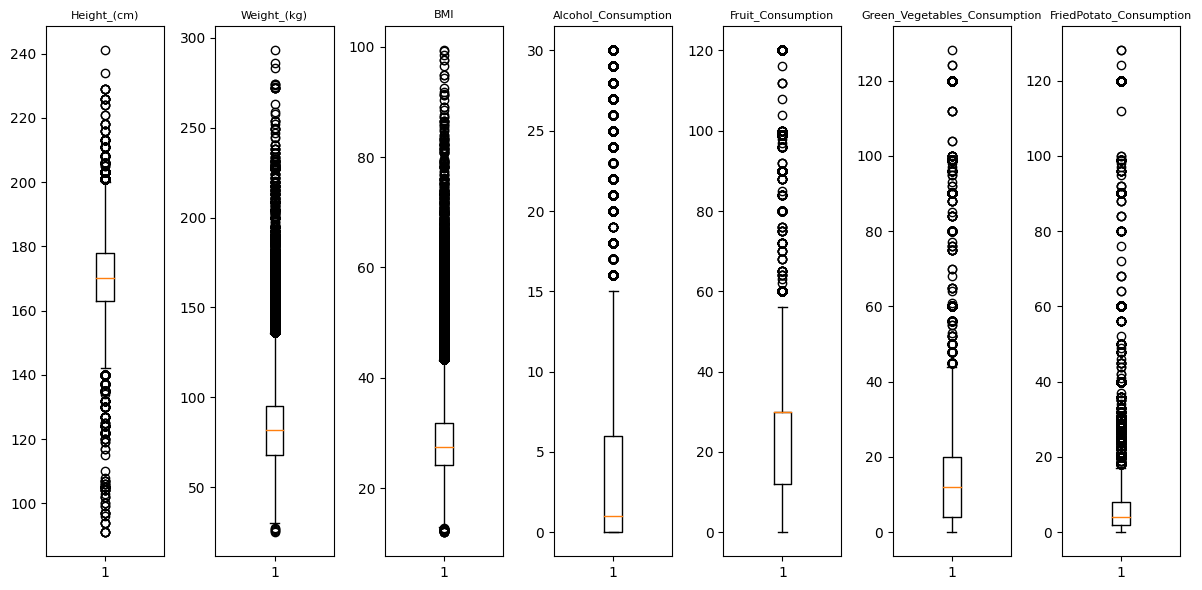

In [ ]:
#Create side-by-side box plots for each numerical column
plt.figure(figsize=(12, 6))

for i, column in enumerate(numerical_columns.columns):
    plt.subplot(1, len(numerical_columns.columns), i+1)
    plt.boxplot(numerical_columns[column])
    plt.title(column, fontsize=8)

plt.tight_layout()
plt.show()

In [ ]:
#Test outliers
cvd_df[cvd_df['BMI'] == 99.33]

,General_Health,Checkup,Exercise,Heart_Disease,Skin_Cancer,Other_Cancer,Depression,Diabetes,Arthritis,Sex,Age_Category,Height_(cm),Weight_(kg),BMI,Smoking_History,Alcohol_Consumption,Fruit_Consumption,Green_Vegetables_Consumption,FriedPotato_Consumption
255795,Good,Within the past year,Yes,No,No,No,No,Yes,No,Male,50-54,97.0,92.53,99.33,No,2.0,30.0,8.0,28.0


**Results:**

There are no missing values in this dataset. There happened to be 80 duplicate rows in the dataset, and these duplicated rows could be a mistake. Including these duplicated rows in the data can mess with my data analysis, so I simply dropped those duplicates to deal with the problem. As seen through the box-plots above, each of the numerical columns in the data have outliers. Some of these outliers are out of the ordinary and can be mistakes; however, some of the outliers could be understood as legitimate, plausible values.


Height_(cm)


*   The minimum height in the data is 91 centimeters (around 3 feet), and there are five individuals with this height. Since some individuals, such as dwarfs, can have this height, it's likely not a mistake.
*   The maximum height in the data is 241 centimeters (7.9 feet), and there is one individual with this height. Someone can be 7.9 feet considering the tallest person who ever lived was over 8 feet tall.

Weight_(kg)


*   The minimum weight in the data is 24.95 kg (55 pounds), which is a plausible value.
*   The maximum weight in the data is 293.02 kg (643 pounds), which is quite a high value, so it could be considered as extreme or a mistake.

BMI


*   The minimum BMI in the data is 12.02. The individual with this BMI is a female who is 163 cm tall and weighs 31.75 kg; these values add up to a BMI of around 12.
*   The maximum BMI in the data is 99.33. 99.33 is a very extreme value for a BMI and is unrealistic. This could be a data entry error.

Alcohol_Consumption


*   The highest value in the data is 30, which is quite high for someone to be drinking that much in a month and is worth looking into.

Fruit_Consumption


*   *"a 128 response would be a representative of a person who consume fruits at least 4-5 times a day"*
*   The maximum value of 120 indicates that this individual consumes fruits at least 4-5 times a day, which is quite high, but could be plausible when considering serving sizes.

Green_Vegetables_Consumption


*   Similar to my reasoning with Fruit_Consumption, the maximum value of 128 indicates that the individual consumes vegetables at least 4-5 time a day, which is quite high, but could be plausible when considering serving sizes.

FriedPotato_Consumption


*   Similar to my reasoning with Fruit_Consumption and Green_Vegetables_Consumption, the maximum value of 128 indicates that the individual consumes fried potatoes at least 4-5 time a day, which is quite high, but could be plausible when considering serving sizes.

In the original BRFSS dataset, the dataset contained 438,693 records and 304 features. However, due to the irrelevance of some of the features to the particular study, a smaller set of 19 features, specifically related to lifestyle factors that have commonly been associated with an increased risk of various cardiovascular diseases, were incorporated into our Cardiovascular Diseases Risk Prediction Dataset. When using these 19 chosen features to construct machine learning models and predictive models for cardiovascular diseases, the number of records that were used reduced from 438,693 to 308,854. The creators of this dataset make no mention of their data preprocessing methods in their paper. Instead, their paper glosses over their cleaning and preprocessing methods to focus mainly on the myriad of machine learning algorithms they employed, and the performance of those algorithms. On Kaggle, they mention that preprocessing was done using pandas, and their goal in the data cleaning was to make the data understandable. It is possible that they directly filtered out any records with missing values. There are many other possibilities of their data cleaning methods, but without any direct statement from the creators it is impossible to conclusively state what they did. The creators also mention class imbalances. They employed sampling techniques to rectify this and balance the data. It is possible that some of the ~130000 records cut from the original BRFSS data were filtered out to maintain class balance.









In [ ]:
#Display summary statistics for numerical variables
numerical_columns.describe()

,Height_(cm),Weight_(kg),BMI,Alcohol_Consumption,Fruit_Consumption,Green_Vegetables_Consumption,FriedPotato_Consumption
count,308774.000000,308774.000000,308774.000000,308774.000000,308774.000000,308774.000000,308774.000000
mean,170.615220,83.590399,28.626813,5.097557,29.834290,15.109517,6.297237
std,10.658452,21.344664,6.522810,8.200434,24.877812,14.926912,8.583837
min,91.000000,24.950000,12.020000,0.000000,0.000000,0.000000,0.000000
25%,163.000000,68.040000,24.210000,0.000000,12.000000,4.000000,2.000000
50%,170.000000,81.650000,27.440000,1.000000,30.000000,12.000000,4.000000
75%,178.000000,95.250000,31.850000,6.000000,30.000000,20.000000,8.000000
max,241.000000,293.020000,99.330000,30.000000,120.000000,128.000000,128.000000


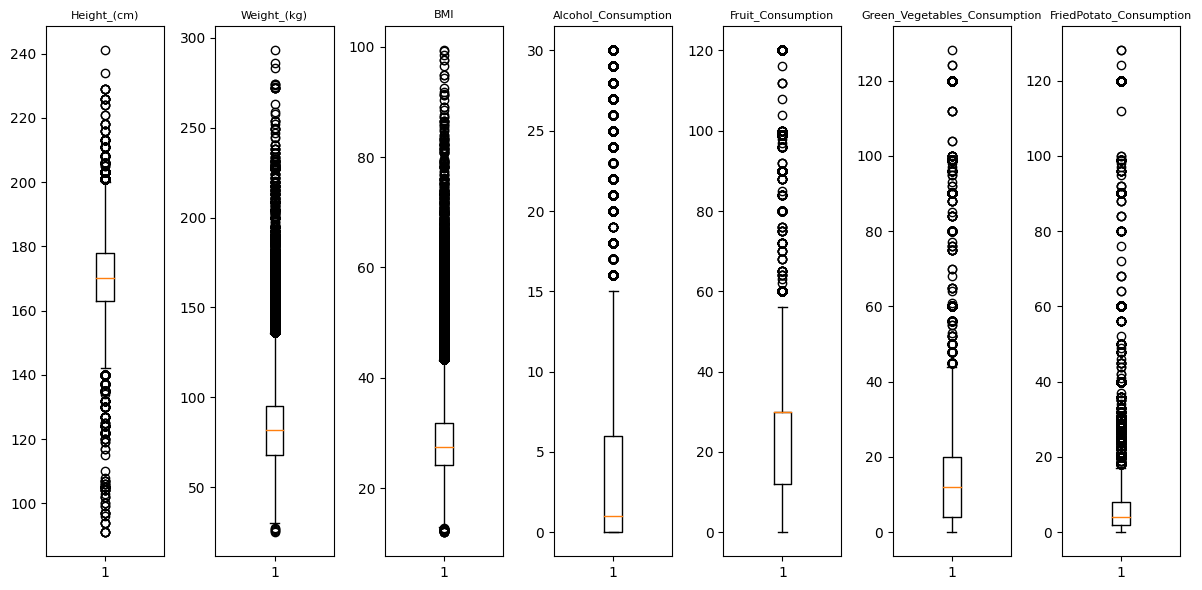

In [ ]:
#Create side-by-side box plots for each numerical column
plt.figure(figsize=(12, 6))

for i, column in enumerate(numerical_columns.columns):
    plt.subplot(1, len(numerical_columns.columns), i+1)
    plt.boxplot(numerical_columns[column])
    plt.title(column, fontsize=8)

plt.tight_layout()
plt.show()

In [ ]:
#Display counts for each category within each categorical column
categorical_columns = ['General_Health', 'Checkup', 'Exercise', 'Heart_Disease', 'Skin_Cancer', 'Other_Cancer', 'Depression', 'Diabetes', 'Arthritis', 'Sex', 'Age_Category', 'Smoking_History']

#Calculate the counts of each category for all the categorical columns
for column in categorical_columns:
    column_counts = cvd_df[column].value_counts()
    print(f"\nCounts of each category in '{column}':")
    print(column_counts)


Counts of each category in 'General_Health':
Very Good    110351
Good          95355
Excellent     55929
Fair          35808
Poor          11331
Name: General_Health, dtype: int64

Counts of each category in 'Checkup':
Within the past year       239295
Within the past 2 years     37210
Within the past 5 years     17442
5 or more years ago         13420
Never                        1407
Name: Checkup, dtype: int64

Counts of each category in 'Exercise':
Yes    239305
No      69469
Name: Exercise, dtype: int64

Counts of each category in 'Heart_Disease':
No     283803
Yes     24971
Name: Heart_Disease, dtype: int64

Counts of each category in 'Skin_Cancer':
No     278782
Yes     29992
Name: Skin_Cancer, dtype: int64

Counts of each category in 'Other_Cancer':
No     278897
Yes     29877
Name: Other_Cancer, dtype: int64

Counts of each category in 'Depression':
No     246875
Yes     61899
Name: Depression, dtype: int64

Counts of each category in 'Diabetes':
No                           

In [ ]:
#Calculate the counts of each category in 'Age_Category'
age_category_counts = cvd_df['Age_Category'].value_counts()

#Separate counts for 55+ and 25-54 age groups
age_group_55_plus = age_category_counts[age_category_counts.index.str.contains('55-59|60-64|65-69|70-74|75-79|80\+')].sum()
age_group_25_to_54 = age_category_counts[age_category_counts.index.str.contains('25-29|30-34|35-39|40-44|45-49|50-54')].sum()

#Print the counts for each age group
print("Sum for 55+ age group:")
print(age_group_55_plus)

print("\nSum for 25-54 age group:")
print(age_group_25_to_54)

Sum for 55+ age group:
167949

Sum for 25-54 age group:
122155


**Findings:**


*   From looking at the side-by-side box-plots, we can see that the heights, weights, and BMI of the individuals in this dataset appear to be normally distributed (when disregarding the outliers). The heights were centered around the median of 170 cm, the weights were centered around the median of 81.65 kg, and BMI was centered around the median of 27.44.

*   From looking at the side-by-side box-plots, we can see that the variables Alcohol_Consumption, Fruit_Consumption, Green_Vegetables_Consumption, and FriedPotato_Consumption seem to be right-skewed, which interestingly indicates that most of the individuals in this dataset tended to consume less of alcohol, fruits, vegetables, and fried potato.

*   A majority of individuals rated their general health as "very good" or "good", which indicates that most of the individuals in the data think of themselves as having good health.

*   A significant majority of individuals in the data have had a checkup within the past year. This is a good sign since it means that the individuals in this data are able to get their health checked for health issues such as heart disease, skin cancer, diabetes, etc. Hopefully, this means that it is more likely that the individuals' health conditions are more accurately captured since they have had checkups within the past year.

*   The count of individuals with heart disease is relatively low. Only 24971 of 308774 have reported having heart disease, so this will have to be considered when building models for analysis and prediction.

*   The count of individuals with skin cancer, any other cancer, depression, and diabetes is relatively low, just like how the prevalence of heart disease is relatively low. However, roughly a third of the individuals in this dataset have reported having arthritis, which is an interesting finding that raises questions on why so many individuals in this dataset happen to have arthritis.

*   In this dataset, there are 160155 females and 148619 males, which is important to keep note of.

*   There are 122155 individuals with ages 25-54 and 167949 individuals 55 and above. More than half of the individuals in the dataset are above 55 years old, which makes sense since people usually start experiencing health issues as they get older.

*   40.6% of the individuals in this dataset have a smoking history (125258/308774)





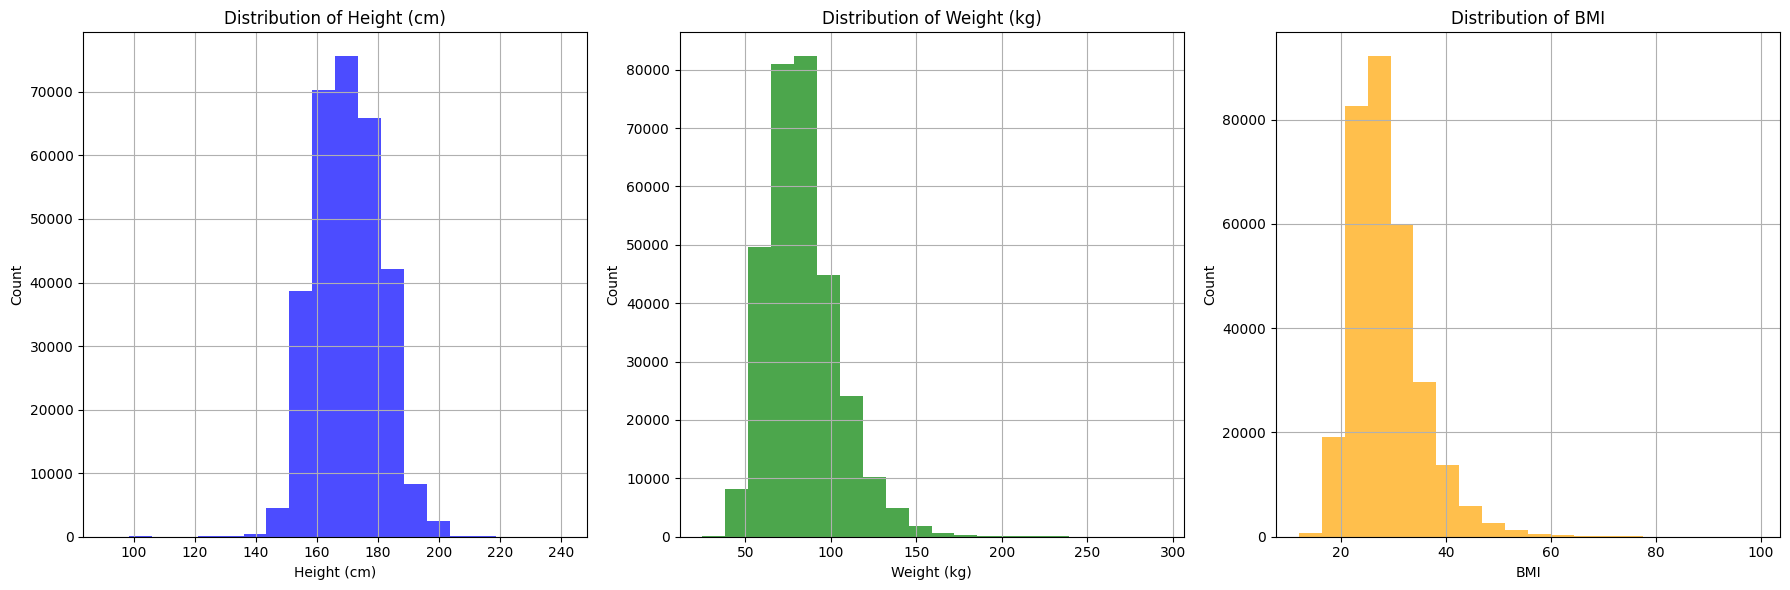

In [ ]:
#Create subplots for all three histograms
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(18, 6))

#'Height_(cm)' Histogram
axes[0].hist(cvd_df['Height_(cm)'], bins=20, color='blue', alpha=0.7)
axes[0].set_xlabel('Height (cm)')
axes[0].set_ylabel('Count')
axes[0].set_title('Distribution of Height (cm)')
axes[0].grid(True)

#'Weight_(kg)' Histogram
axes[1].hist(cvd_df['Weight_(kg)'], bins=20, color='green', alpha=0.7)
axes[1].set_xlabel('Weight (kg)')
axes[1].set_ylabel('Count')
axes[1].set_title('Distribution of Weight (kg)')
axes[1].grid(True)

#'BMI' Histogram
axes[2].hist(cvd_df['BMI'], bins=20, color='orange', alpha=0.7)
axes[2].set_xlabel('BMI')
axes[2].set_ylabel('Count')
axes[2].set_title('Distribution of BMI')
axes[2].grid(True)

plt.tight_layout()
plt.show()

**Interpretation:**

When plotting histograms to show the distribution of heights (cm), weights (kg), and BMI, we can see that the heights, weights, and BMI are normally distributed. Although there is a slight right skew for the distribution of BMI, the overall shape indicates a normal distribution. Seeing a normally distributed sample in our data is important because it indicates that our data is more or less representative of the distribution of the heights, weights, and BMI of the total population since the distribution of heights, weights, and BMI of the total population is normally distributed. As seen in the histograms, although each variable is not perfectly normally distributed, each distribution has an overall bell-curved shape. Each of the distributions also does not appear to be heavily skewed, which is a good indication of a representative sample. I chose to use this visualization because it is important to understand the individuals in this dataset when performing analysis and building predictive models. In this case, it is essential to understand that the heights, weights, and BMI of individuals in this dataset are a relatively representative sample of the heights, weights, and BMI of total population. It is important to note that a sample being representative of the entire population includes other factors (such as age, gender, ethnicity, etc) other than just height, weight, and BMI.

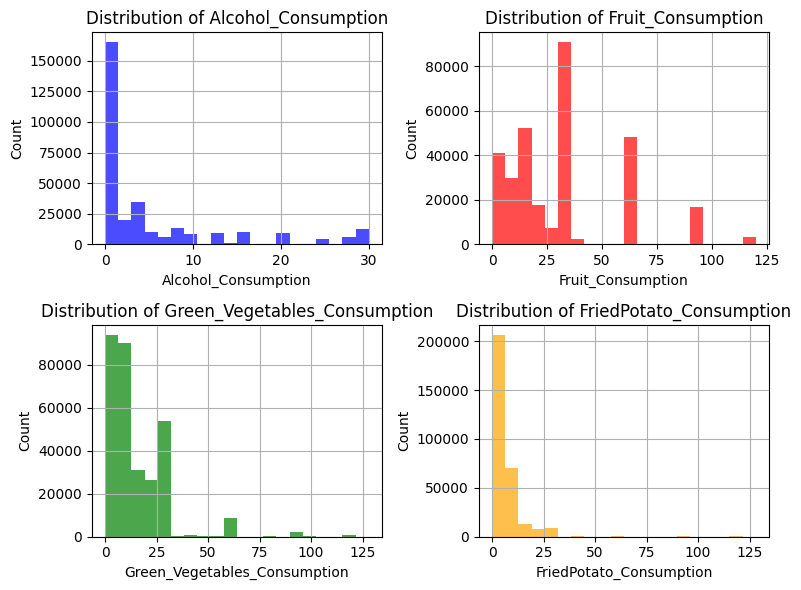

In [ ]:
#Create subplots with two rows and two columns for all four histograms
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(8, 6))

#'Alcohol_Consumption' Histogram
axes[0, 0].hist(cvd_df['Alcohol_Consumption'], bins=20, color='blue', alpha=0.7)
axes[0, 0].set_xlabel('Alcohol_Consumption')
axes[0, 0].set_ylabel('Count')
axes[0, 0].set_title('Distribution of Alcohol_Consumption')
axes[0, 0].grid(True)

#'Fruit_Consumption' Histogram
axes[0, 1].hist(cvd_df['Fruit_Consumption'], bins=20, color='red', alpha=0.7)
axes[0, 1].set_xlabel('Fruit_Consumption')
axes[0, 1].set_ylabel('Count')
axes[0, 1].set_title('Distribution of Fruit_Consumption')
axes[0, 1].grid(True)

#'Green_Vegetables_Consumption' Histogram
axes[1, 0].hist(cvd_df['Green_Vegetables_Consumption'], bins=20, color='green', alpha=0.7)
axes[1, 0].set_xlabel('Green_Vegetables_Consumption')
axes[1, 0].set_ylabel('Count')
axes[1, 0].set_title('Distribution of Green_Vegetables_Consumption')
axes[1, 0].grid(True)

#'FriedPotato_Consumption' Histogram
axes[1, 1].hist(cvd_df['FriedPotato_Consumption'], bins=20, color='orange', alpha=0.7)
axes[1, 1].set_xlabel('FriedPotato_Consumption')
axes[1, 1].set_ylabel('Count')
axes[1, 1].set_title('Distribution of FriedPotato_Consumption')
axes[1, 1].grid(True)

plt.tight_layout()
plt.show()

**Interpretation:**

When plotting histograms to show the distribution of alcohol consumption, fruit consumption, green vegetable consumption, and fried potato consumption, we can evidently see a right skew to all four distributions. This interestingly indicates that most of the individuals in this dataset tended to consume less of alcohol, fruits, vegetables, and fried potato. Over 200000 individuals reported a FriedPotato_Consumption score of 25 or below, which is a low score that makes an interesting find. Consuming too much fried potato is relatively unhealthy, and this right skewed distribution shows that the individuals in this sample have relatively low fried potato consumption. I chose to use this visualization because it is important to visualize the distribution of the numerical variables in the dataset. I have used box-plots to visualize these variables earlier in my analysis, but having a histogram helps us to better visualize the data from a different point of view.

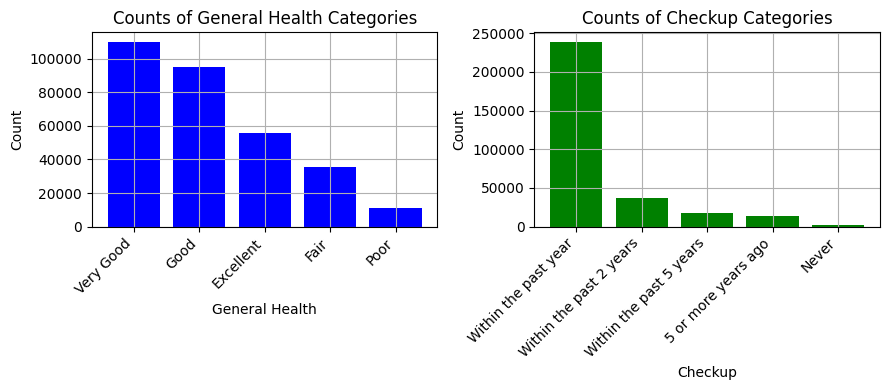

In [ ]:
#Create subplots for the side-by-side bar charts
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(9, 4))

#'General_Health' Bar chart
general_health_counts = cvd_df['General_Health'].value_counts()
axes[0].bar(general_health_counts.index, general_health_counts.values, color='blue')
axes[0].set_xlabel('General Health')
axes[0].set_ylabel('Count')
axes[0].set_title('Counts of General Health Categories')
axes[0].grid(True)

#'Checkup' Bar chart
checkup_counts = cvd_df['Checkup'].value_counts()
axes[1].bar(checkup_counts.index, checkup_counts.values, color='green')
axes[1].set_xlabel('Checkup')
axes[1].set_ylabel('Count')
axes[1].set_title('Counts of Checkup Categories')
axes[1].grid(True)

#Rotate labels
plt.setp(axes[0].get_xticklabels(), rotation=45, ha='right')
plt.setp(axes[1].get_xticklabels(), rotation=45, ha='right')

plt.tight_layout()
plt.show()

**Interpretation:**

When plotting a bar chart to show the counts of each category for individuals' general health, we see that a majority of individuals rated their general health as "very good" or "good", which indicates that most of the individuals in the data think of themselves as having good health. When plotting a bar chart to show the counts of each category for individuals' checkup frequency, we see that a significant majority of individuals in the data have had a checkup within the past year. This is a good sign since it means that the individuals in this data are able to get their health checked for health issues such as heart disease, skin cancer, diabetes, etc. Hopefully, this means that it is more likely that the individuals' health conditions are more accurately captured since they have had checkups within the past year. I chose to use a bar graph to visualize these two variables because it very clearly shows the counts of each of the categories in descending order. It is important to keep these two variables in mind since it helps us to understand more about the individuals in this dataset.

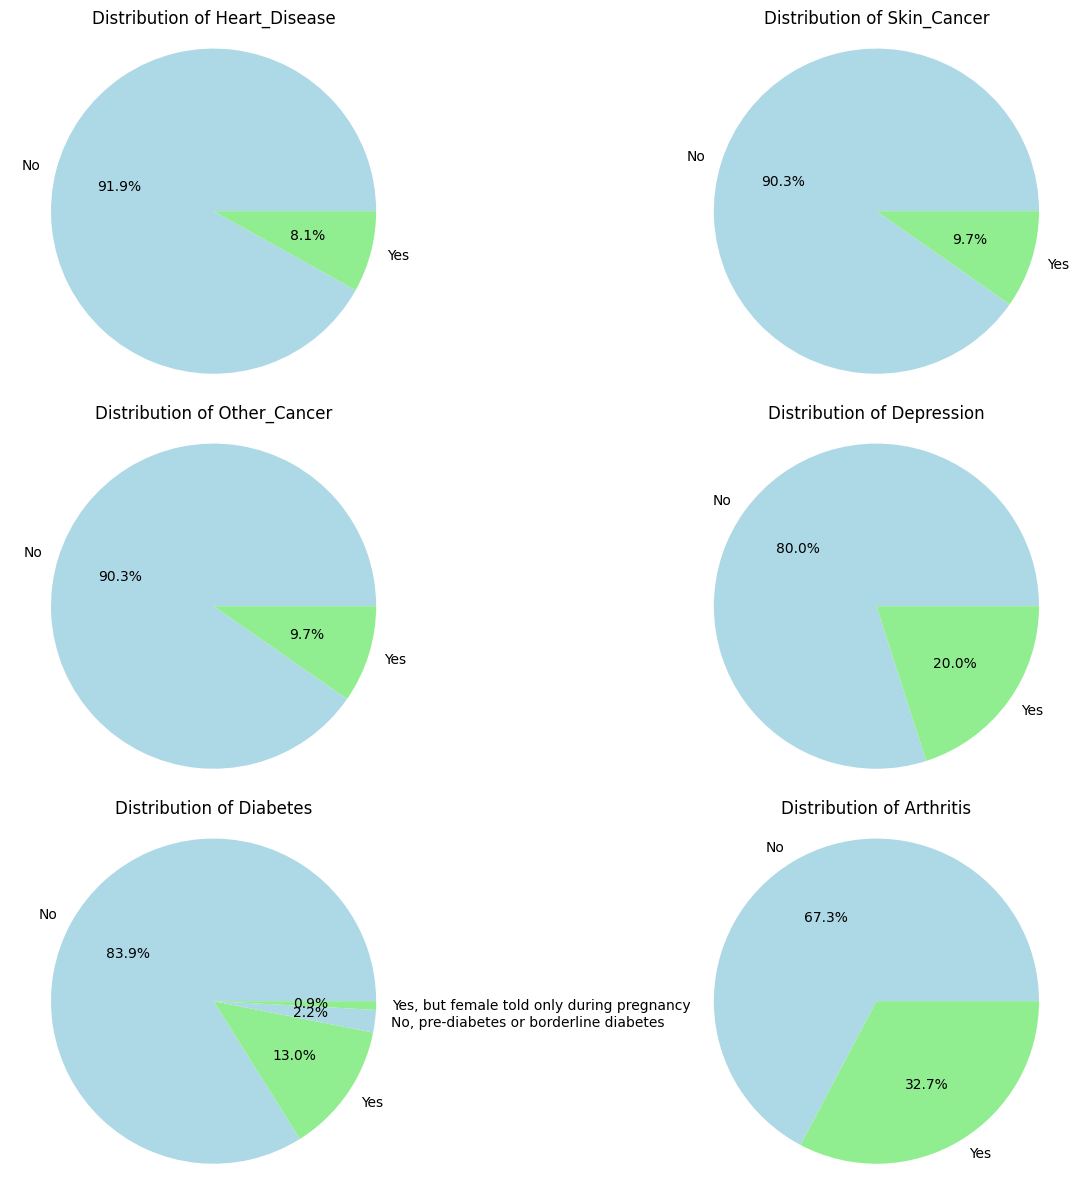

In [ ]:
#Create subplots for the side-by-side pie charts
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(11, 12))

#List of columns to create pie charts for
pie_columns = ['Heart_Disease', 'Skin_Cancer', 'Other_Cancer', 'Depression', 'Diabetes', 'Arthritis']

#Create pie charts for each column
for i, column in enumerate(pie_columns):
    ax = axes[i // 2, i % 2]
    column_counts = cvd_df[column].value_counts()
    ax.pie(column_counts, labels=column_counts.index, autopct='%1.1f%%', colors=['lightblue', 'lightgreen'])
    ax.set_title(f'Distribution of {column}')
    ax.axis('equal')

plt.tight_layout()
plt.show()

**Interpretation:**

When plotting pie charts to show the percentages of "yes" and "no" to having heart disease, skin cancer, any other cancer, depression, diabetes, and arthritis, we see that the percentage of individuals with heart disease is relatively low, with only 8.1% have reported having heart disease, so this will have to be considered when building models for analysis and prediction. The percentage of individuals with skin cancer, any other cancer, depression, and diabetes is relatively low, just like how the prevalence of heart disease is relatively low. However, roughly a third of the individuals in this dataset have reported having arthritis, which is an interesting finding that raises questions on why so many individuals in this dataset happen to have arthritis. I chose to use pie charts to visualize the data because considering how the data is in the categories "yes" or "no", these pie charts easily show the percentages of having certain health issues versus the percentage of not having certain health issues.

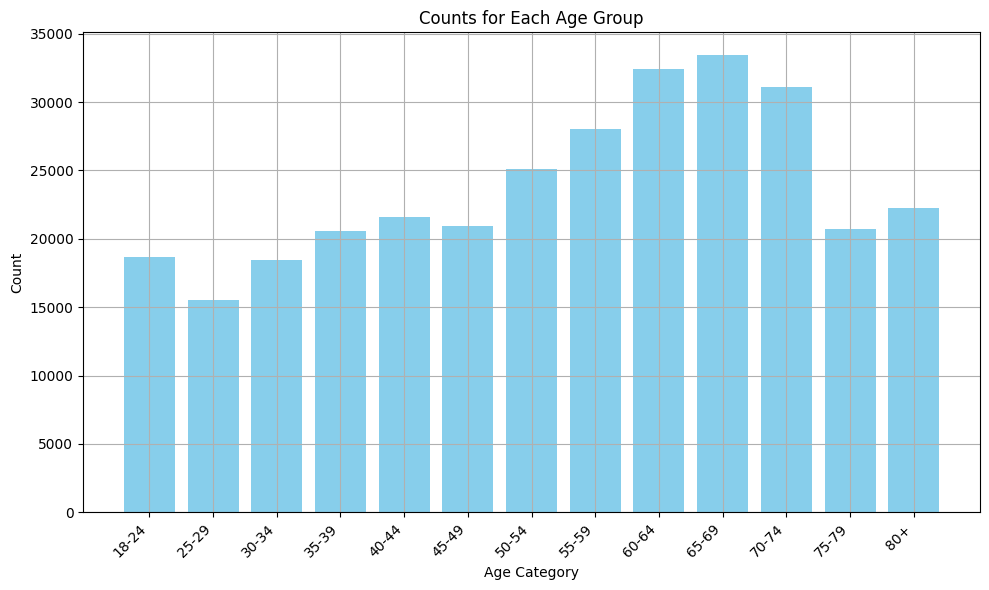

In [ ]:
#Define the order of the age categories
age_categories_order = ['18-24', '25-29', '30-34', '35-39', '40-44', '45-49', '50-54', '55-59', '60-64', '65-69', '70-74', '75-79', '80+']

#Calculate the counts for each age group in 'Age_Category' in the specified order
age_category_counts = cvd_df['Age_Category'].value_counts().loc[age_categories_order]

#Create a bar chart for the counts of each age group
plt.figure(figsize=(10, 6))
plt.bar(age_category_counts.index, age_category_counts.values, color='skyblue')
plt.xlabel('Age Category')
plt.ylabel('Count')
plt.title('Counts for Each Age Group')
plt.xticks(rotation=45, ha='right')  #Rotate x-axis labels
plt.grid(True)

plt.tight_layout()
plt.show()

**Interpretation:**

When plotting the age categories across the x-axis and the count of individuals in each category on the y-axis, we can see that there are more older people in the data compared to younger people. There are 122155 individuals with ages 25-54 and 167949 individuals 55 and above. More than half of the individuals in the dataset are above 55 years old. This is an interesting finding because it would make sense that more older individuals might likely be included in this data since as individuals get older, they are likely to exhibit more health issues. I chose to visualize this variable in a bar chart because it effectively shows the age distribution of the data, which helps us to better understand the individuals in the data.

<BarContainer object of 2 artists>

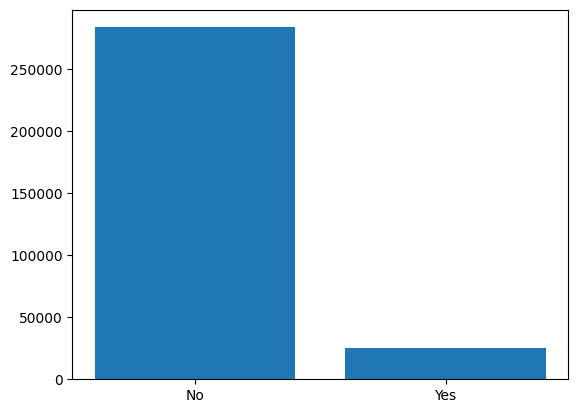

In [ ]:
plt.bar(x = cvd_df['Heart_Disease'].unique(), height = cvd_df['Heart_Disease'].value_counts())

**Interpretation:**

Heart disease is the individually most important column in the dataset, as it is the feature that the entire dataset is centered around. This is the feature we will primarily be aiming to predict. This bar plot indicates the severe imbalances between the two classes within heart disease. Bar plots lend themselves well to this applicatiom, that is displaying absolute frequencies among categorical variables.

<BarContainer object of 2 artists>

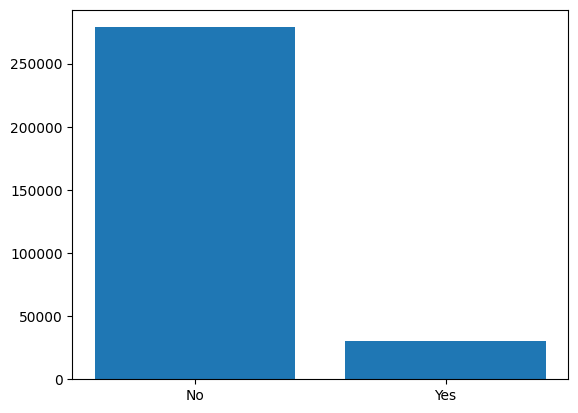

In [ ]:
plt.bar(x = cvd_df['Skin_Cancer'].unique(), height = cvd_df['Skin_Cancer'].value_counts())

**Interpretation:**

Skin Cancer is, in my personal belief prior to any significant analysis, one of the least important features to predicting cardiovascular disease. Skin cancer is a completely separate disease, but it is possible that they share risk factors. Thus, analyzing any potential correlation between skin cancer and heart disease could prove useful.

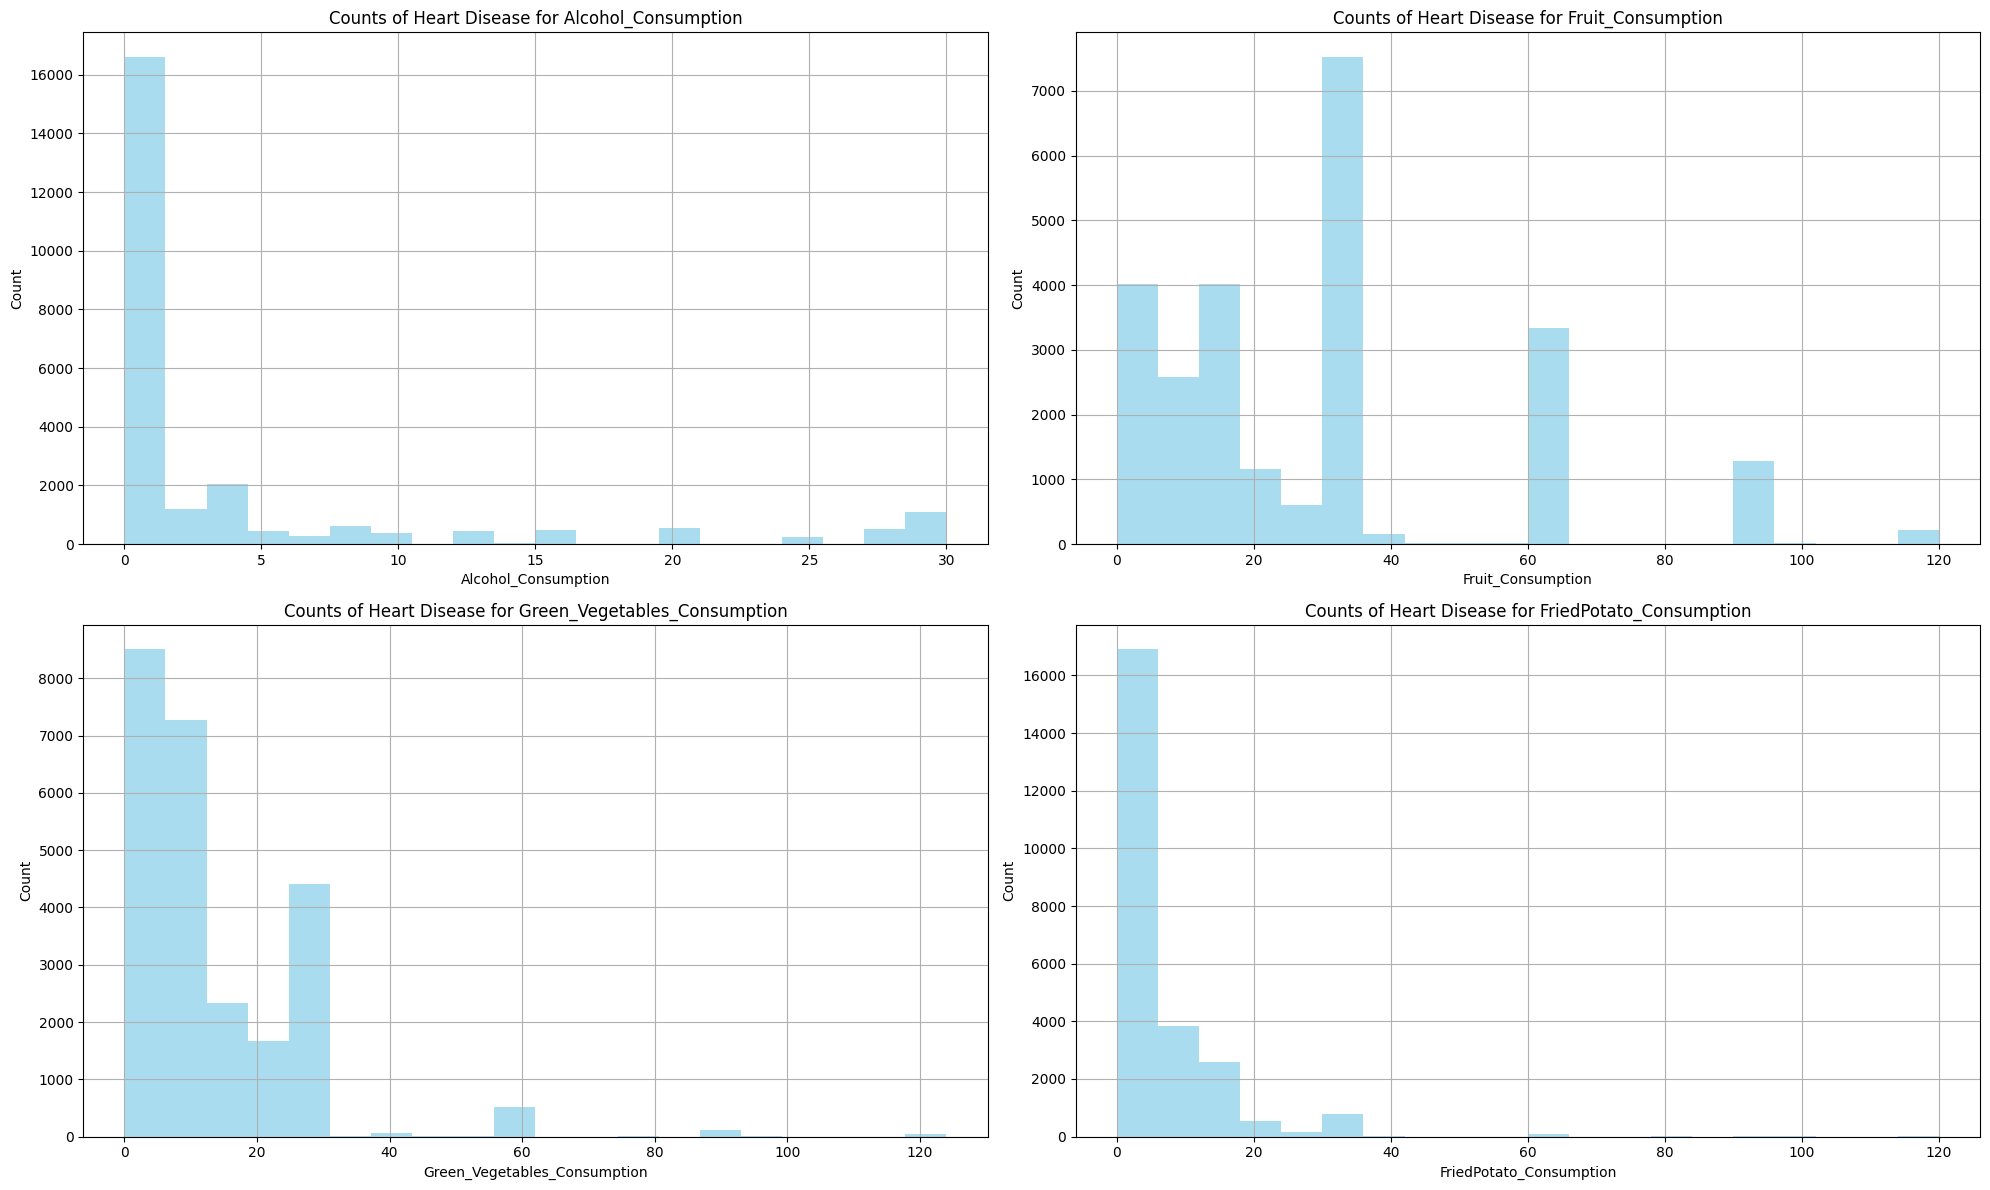

In [ ]:
#Define the columns for which you want to create histograms
histogram_columns = ['Alcohol_Consumption', 'Fruit_Consumption', 'Green_Vegetables_Consumption', 'FriedPotato_Consumption']

#Create subplots for the side-by-side histograms with two rows
fig, axes = plt.subplots(nrows=2, ncols=len(histogram_columns)//2, figsize=(20, 12))

#Filter data for individuals with heart disease
heart_disease_df = cvd_df[cvd_df['Heart_Disease'] == 'Yes']

#Create histograms for each column
for i, column in enumerate(histogram_columns):
    ax = axes[i // (len(histogram_columns) // 2), i % (len(histogram_columns) // 2)]
    ax.hist(heart_disease_df[column], bins=20, color='skyblue', alpha=0.7)
    ax.set_xlabel(column)
    ax.set_ylabel('Count')
    ax.set_title(f'Counts of Heart Disease for {column}')
    ax.grid(True)

plt.tight_layout()
plt.show()

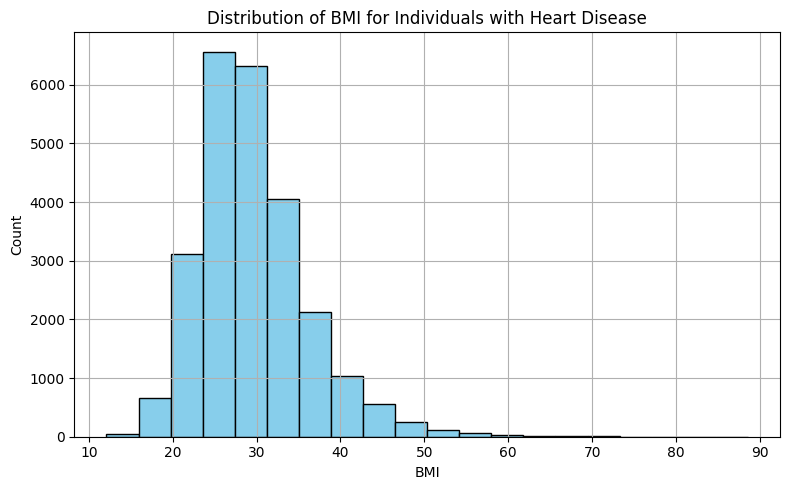

In [ ]:
#Filter the DataFrame to include only individuals with heart disease
heart_disease_df = cvd_df[cvd_df['Heart_Disease'] == 'Yes']

#Create a histogram for BMI with bins
plt.figure(figsize=(8, 5))
plt.hist(heart_disease_df['BMI'], bins=20, color='skyblue', edgecolor='black')
plt.xlabel('BMI')
plt.ylabel('Count')
plt.title('Distribution of BMI for Individuals with Heart Disease')
plt.grid(True)

plt.tight_layout()
plt.show()

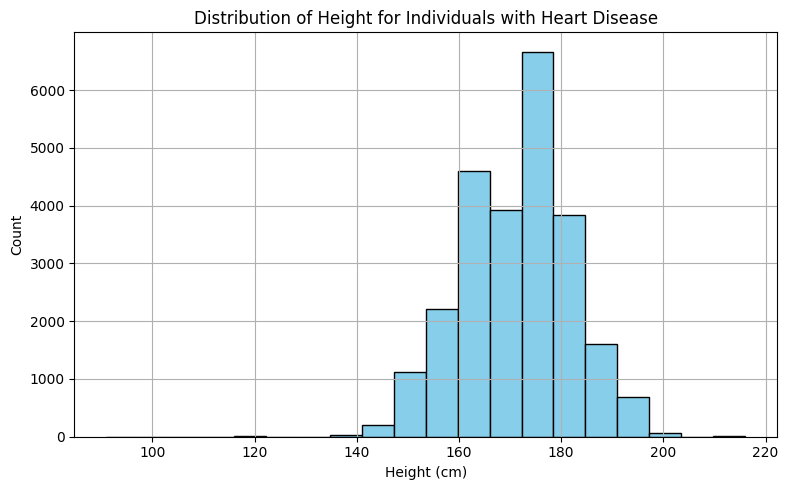

In [ ]:
#Filter the DataFrame to include only individuals with heart disease
heart_disease_df = cvd_df[cvd_df['Heart_Disease'] == 'Yes']

#Create a histogram for Height with bins
plt.figure(figsize=(8, 5))
plt.hist(heart_disease_df['Height_(cm)'], bins=20, color='skyblue', edgecolor='black')
plt.xlabel('Height (cm)')
plt.ylabel('Count')
plt.title('Distribution of Height for Individuals with Heart Disease')
plt.grid(True)

plt.tight_layout()
plt.show()

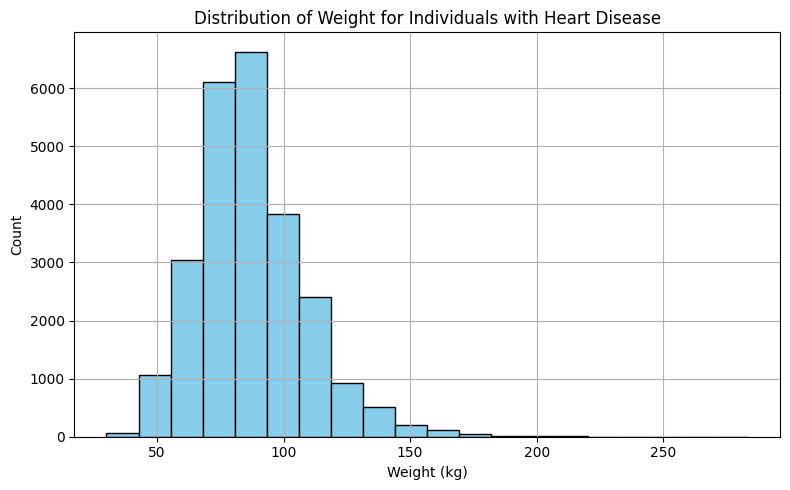

In [ ]:
#Filter the DataFrame to include only individuals with heart disease
heart_disease_df = cvd_df[cvd_df['Heart_Disease'] == 'Yes']

#Create a histogram for Weight with bins
plt.figure(figsize=(8, 5))
plt.hist(heart_disease_df['Weight_(kg)'], bins=20, color='skyblue', edgecolor='black')
plt.xlabel('Weight (kg)')
plt.ylabel('Count')
plt.title('Distribution of Weight for Individuals with Heart Disease')
plt.grid(True)

plt.tight_layout()
plt.show()

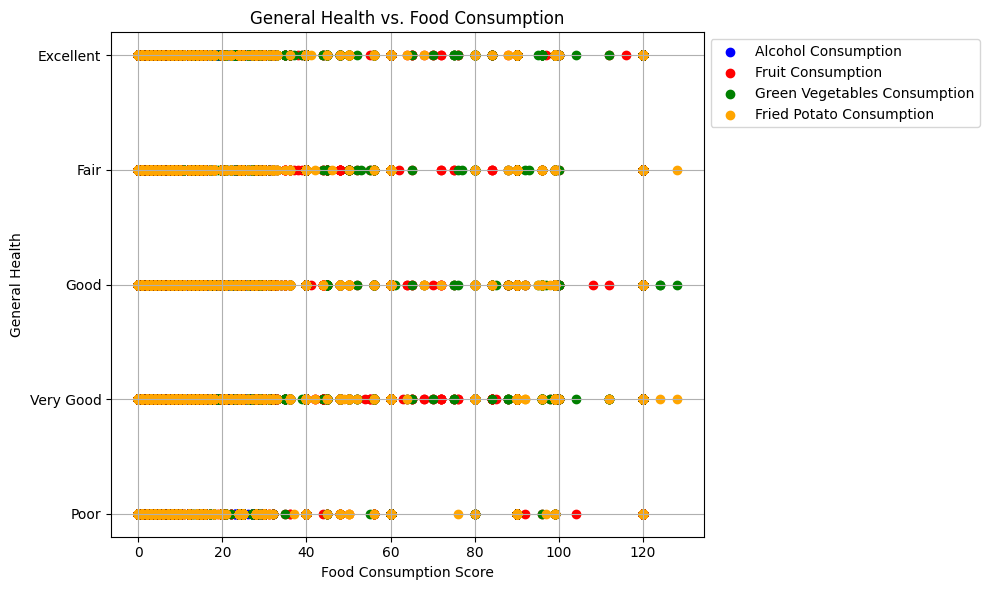

In [ ]:
#Scatter plot for 'Alcohol_Consumption' vs. 'General_Health'
plt.figure(figsize=(10, 6))
plt.scatter(cvd_df['Alcohol_Consumption'], cvd_df['General_Health'], color='blue', label='Alcohol Consumption')

#Scatter plot for 'Fruit_Consumption' vs. 'General_Health'
plt.scatter(cvd_df['Fruit_Consumption'], cvd_df['General_Health'], color='red', label='Fruit Consumption')

#Scatter plot for 'Green_Vegetables_Consumption' vs. 'General_Health'
plt.scatter(cvd_df['Green_Vegetables_Consumption'], cvd_df['General_Health'], color='green', label='Green Vegetables Consumption')

#Scatter plot for 'FriedPotato_Consumption' vs. 'General_Health'
plt.scatter(cvd_df['FriedPotato_Consumption'], cvd_df['General_Health'], color='orange', label='Fried Potato Consumption')

plt.xlabel('Food Consumption Score')
plt.ylabel('General Health')
plt.title('General Health vs. Food Consumption')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.grid(True)

plt.tight_layout()
plt.show()

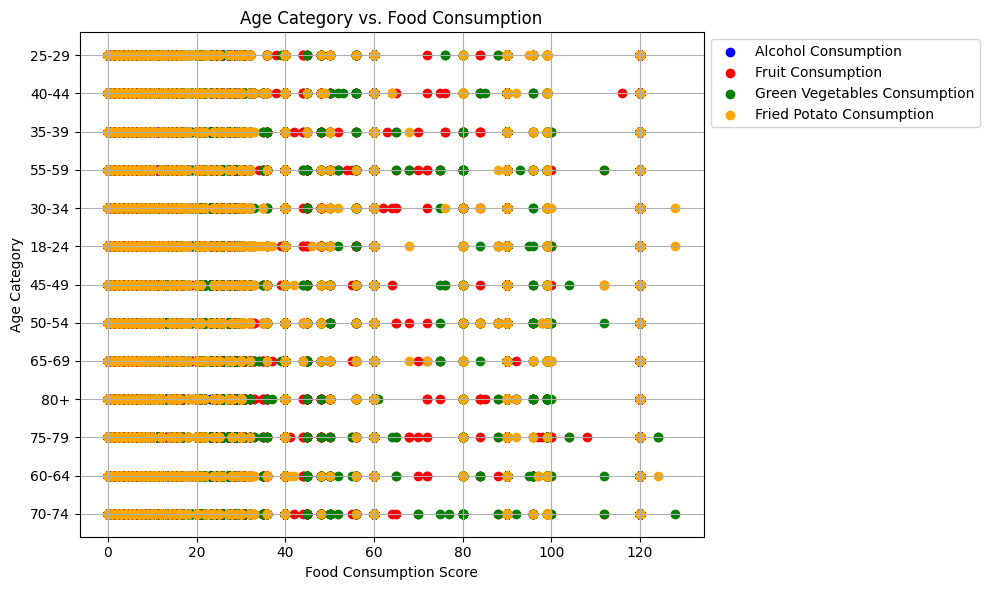

In [ ]:
#Scatter plot for 'Alcohol_Consumption' vs. 'General_Health'
plt.figure(figsize=(10, 6))
plt.scatter(cvd_df['Alcohol_Consumption'], cvd_df['Age_Category'], color='blue', label='Alcohol Consumption')

#Scatter plot for 'Fruit_Consumption' vs. 'General_Health'
plt.scatter(cvd_df['Fruit_Consumption'], cvd_df['Age_Category'], color='red', label='Fruit Consumption')

#Scatter plot for 'Green_Vegetables_Consumption' vs. 'General_Health'
plt.scatter(cvd_df['Green_Vegetables_Consumption'], cvd_df['Age_Category'], color='green', label='Green Vegetables Consumption')

#Scatter plot for 'FriedPotato_Consumption' vs. 'General_Health'
plt.scatter(cvd_df['FriedPotato_Consumption'], cvd_df['Age_Category'], color='orange', label='Fried Potato Consumption')

plt.xlabel('Food Consumption Score')
plt.ylabel('Age Category')
plt.title('Age Category vs. Food Consumption')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.grid(True)

plt.tight_layout()
plt.show()

<Figure size 300x300 with 0 Axes>

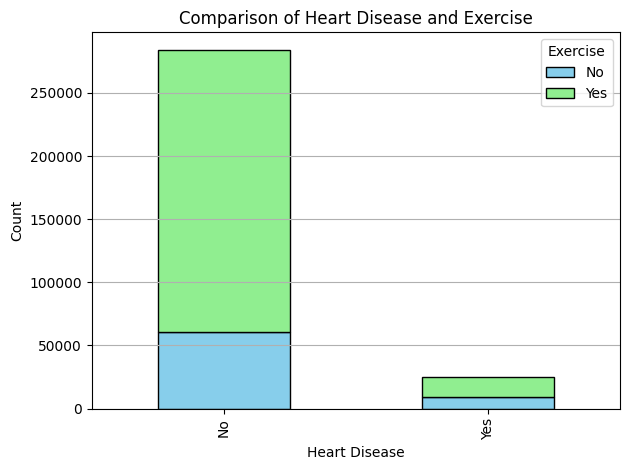

In [ ]:
#Calculate the counts for each combination of 'Heart_Disease' and 'Exercise'
cross_tab = pd.crosstab(cvd_df['Heart_Disease'], cvd_df['Exercise'])

#Create a stacked bar chart
plt.figure(figsize=(3, 3))
cross_tab.plot(kind='bar', stacked=True, color=['skyblue', 'lightgreen'], edgecolor='black')

#Set labels and title
plt.xlabel('Heart Disease')
plt.ylabel('Count')
plt.title('Comparison of Heart Disease and Exercise')
plt.legend(title='Exercise', labels=['No', 'Yes'], loc='upper right')

plt.grid(axis='y')
plt.tight_layout()
plt.show()

<Figure size 300x300 with 0 Axes>

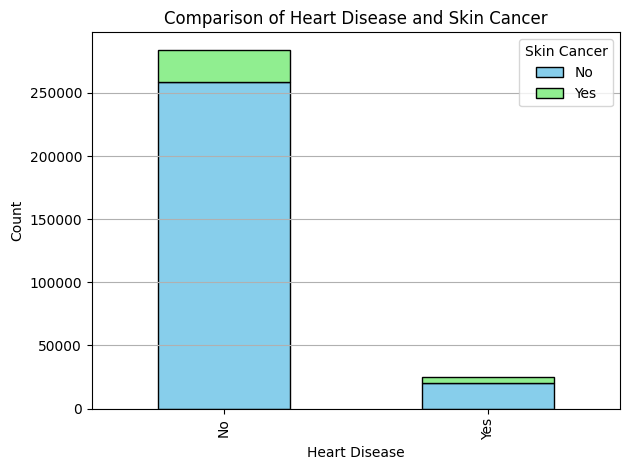

In [ ]:
#Calculate the counts for each combination of 'Heart_Disease' and 'Skin_Cancer'
cross_tab = pd.crosstab(cvd_df['Heart_Disease'], cvd_df['Skin_Cancer'])

#Create a stacked bar chart
plt.figure(figsize=(3, 3))
cross_tab.plot(kind='bar', stacked=True, color=['skyblue', 'lightgreen'], edgecolor='black')

#Set labels and title
plt.xlabel('Heart Disease')
plt.ylabel('Count')
plt.title('Comparison of Heart Disease and Skin Cancer')
plt.legend(title='Skin Cancer', labels=['No', 'Yes'], loc='upper right')

plt.grid(axis='y')
plt.tight_layout()
plt.show()

<Figure size 300x300 with 0 Axes>

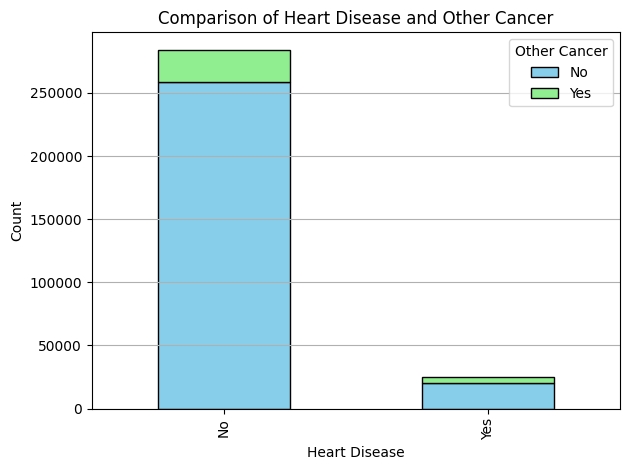

In [ ]:
#Calculate the counts for each combination of 'Heart_Disease' and 'Other_Cancer'
cross_tab = pd.crosstab(cvd_df['Heart_Disease'], cvd_df['Other_Cancer'])

#Create a stacked bar chart
plt.figure(figsize=(3, 3))
cross_tab.plot(kind='bar', stacked=True, color=['skyblue', 'lightgreen'], edgecolor='black')

#Set labels and title
plt.xlabel('Heart Disease')
plt.ylabel('Count')
plt.title('Comparison of Heart Disease and Other Cancer')
plt.legend(title='Other Cancer', labels=['No', 'Yes'], loc='upper right')

plt.grid(axis='y')
plt.tight_layout()
plt.show()

<Figure size 300x300 with 0 Axes>

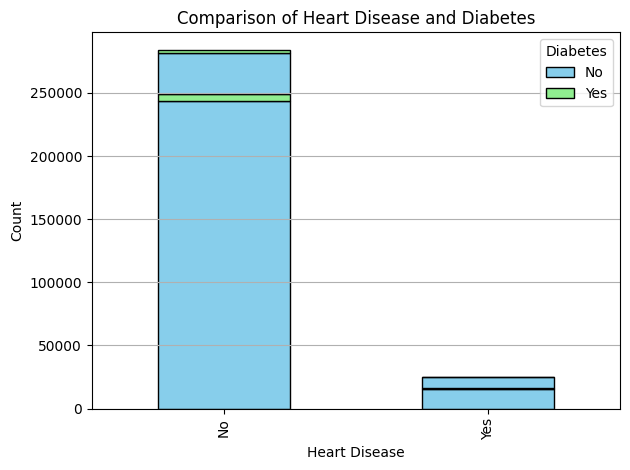

In [ ]:
#Calculate the counts for each combination of 'Heart_Disease' and 'Diabetes'
cross_tab = pd.crosstab(cvd_df['Heart_Disease'], cvd_df['Diabetes'])

#Create a stacked bar chart
plt.figure(figsize=(3, 3))
cross_tab.plot(kind='bar', stacked=True, color=['skyblue', 'lightgreen'], edgecolor='black')

#Set labels and title
plt.xlabel('Heart Disease')
plt.ylabel('Count')
plt.title('Comparison of Heart Disease and Diabetes')
plt.legend(title='Diabetes', labels=['No', 'Yes'], loc='upper right')

plt.grid(axis='y')
plt.tight_layout()
plt.show()

8376
15705


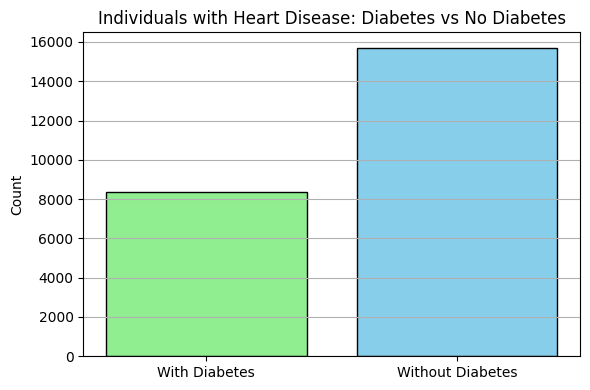

In [ ]:
#Calculate the count of individuals with heart disease who have diabetes
heart_disease_with_diabetes = cvd_df[(cvd_df['Heart_Disease'] == 'Yes') & (cvd_df['Diabetes'] == 'Yes')].shape[0]

print(heart_disease_with_diabetes)
#Calculate the count of individuals with heart disease who do not have diabetes
heart_disease_without_diabetes = cvd_df[(cvd_df['Heart_Disease'] == 'Yes') & (cvd_df['Diabetes'] == 'No')].shape[0]

print(heart_disease_without_diabetes)


#Plotting the counts on a bar chart
labels = ['With Diabetes', 'Without Diabetes']
counts = [heart_disease_with_diabetes, heart_disease_without_diabetes]

plt.figure(figsize=(6, 4))
plt.bar(labels, counts, color=['lightgreen', 'skyblue'], edgecolor='black')

#Set labels and title
plt.ylabel('Count')
plt.title('Individuals with Heart Disease: Diabetes vs No Diabetes')

plt.grid(axis='y')
plt.tight_layout()
plt.show()

<Figure size 300x300 with 0 Axes>

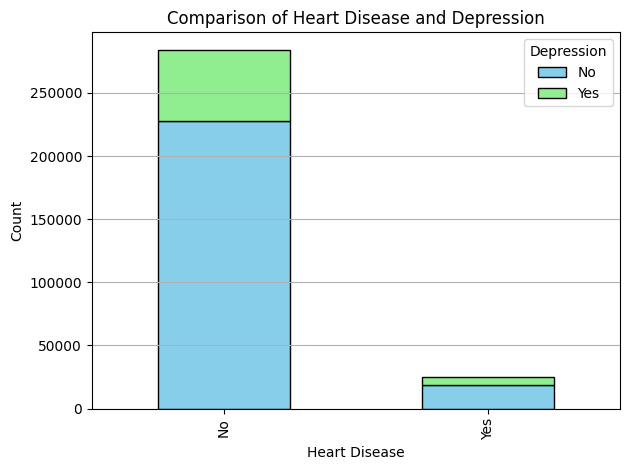

In [ ]:
#Calculate the counts for each combination of 'Heart_Disease' and 'Depression'
cross_tab = pd.crosstab(cvd_df['Heart_Disease'], cvd_df['Depression'])

#Create a stacked bar chart
plt.figure(figsize=(3, 3))
cross_tab.plot(kind='bar', stacked=True, color=['skyblue', 'lightgreen'], edgecolor='black')

#Set labels and title
plt.xlabel('Heart Disease')
plt.ylabel('Count')
plt.title('Comparison of Heart Disease and Depression')
plt.legend(title='Depression', labels=['No', 'Yes'], loc='upper right')

plt.grid(axis='y')
plt.tight_layout()
plt.show()

<Figure size 300x300 with 0 Axes>

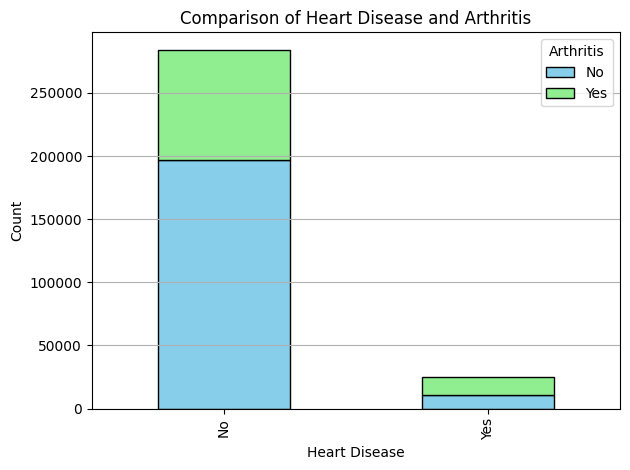

In [ ]:
#Calculate the counts for each combination of 'Heart_Disease' and 'Arthritis'
cross_tab = pd.crosstab(cvd_df['Heart_Disease'], cvd_df['Arthritis'])

#Create a stacked bar chart
plt.figure(figsize=(3, 3))
cross_tab.plot(kind='bar', stacked=True, color=['skyblue', 'lightgreen'], edgecolor='black')

#Set labels and title
plt.xlabel('Heart Disease')
plt.ylabel('Count')
plt.title('Comparison of Heart Disease and Arthritis')
plt.legend(title='Arthritis', labels=['No', 'Yes'], loc='upper right')

plt.grid(axis='y')
plt.tight_layout()
plt.show()

In [ ]:
pd.crosstab(index = cvd_df['Age_Category'], columns = cvd_df['Arthritis'])

Arthritis,No,Yes
Age_Category,,
18-24,18078,592
25-29,14567,925
30-34,16807,1618
35-39,17919,2679
40-44,17901,3686
45-49,16026,4937
50-54,17691,7399
55-59,17974,10074
60-64,18535,13874


As expected, arthritis increases as age increases.

<Figure size 300x300 with 0 Axes>

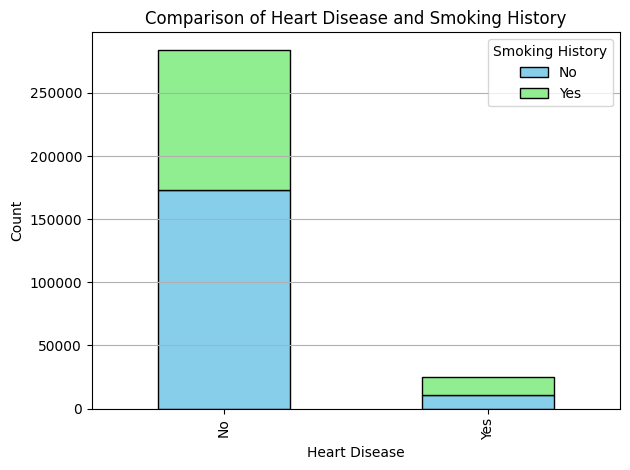

In [ ]:
#Calculate the counts for each combination of 'Heart_Disease' and 'Smoking_History'
cross_tab = pd.crosstab(cvd_df['Heart_Disease'], cvd_df['Smoking_History'])

#Create a stacked bar chart
plt.figure(figsize=(3, 3))
cross_tab.plot(kind='bar', stacked=True, color=['skyblue', 'lightgreen'], edgecolor='black')

#Set labels and title
plt.xlabel('Heart Disease')
plt.ylabel('Count')
plt.title('Comparison of Heart Disease and Smoking History')
plt.legend(title='Smoking History', labels=['No', 'Yes'], loc='upper right')

plt.grid(axis='y')
plt.tight_layout()
plt.show()

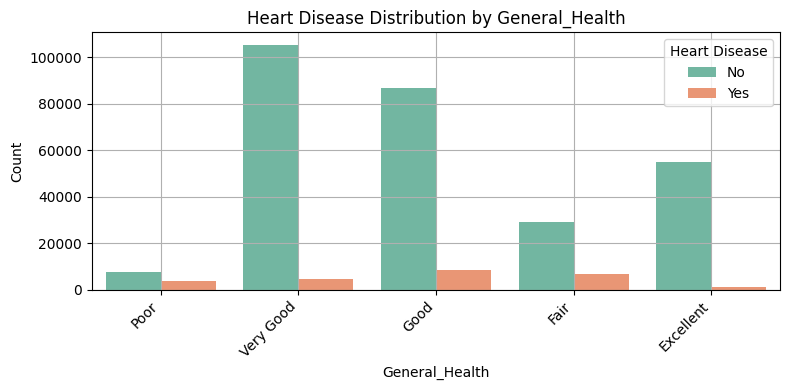

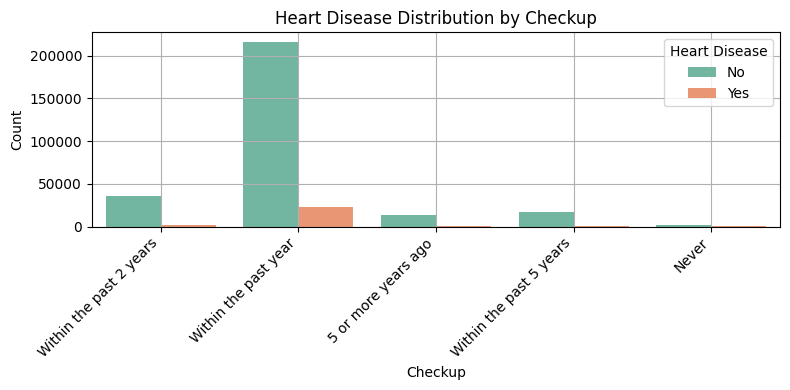

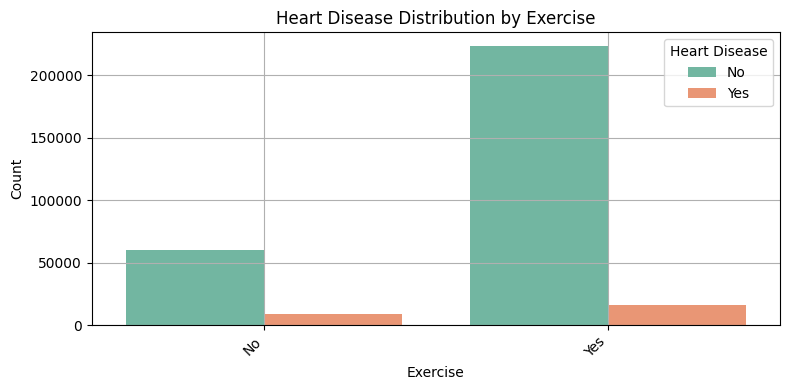

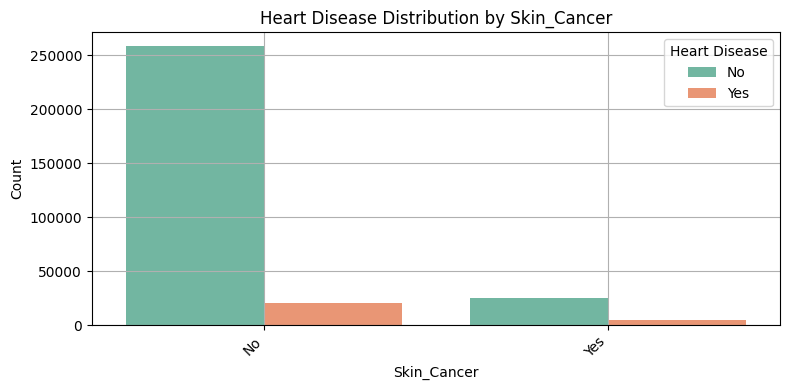

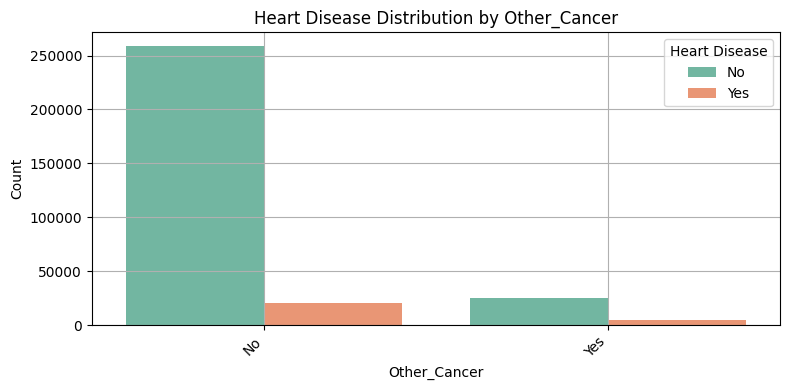

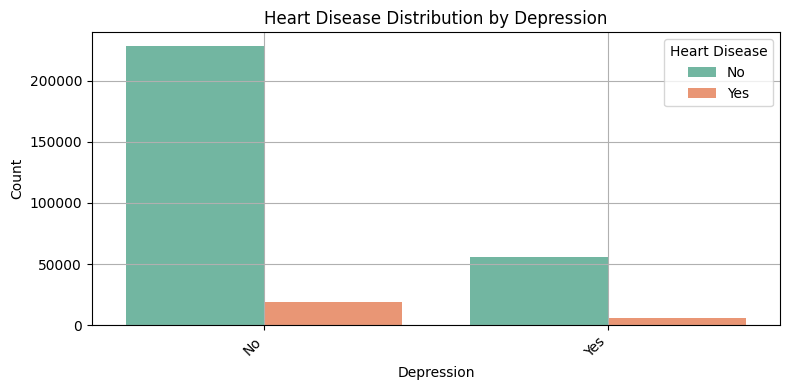

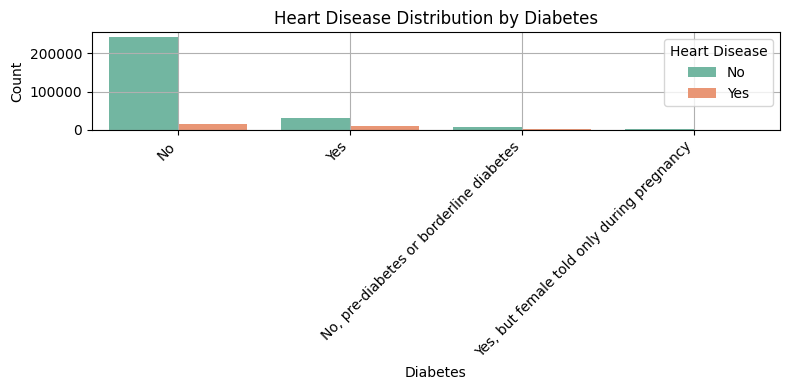

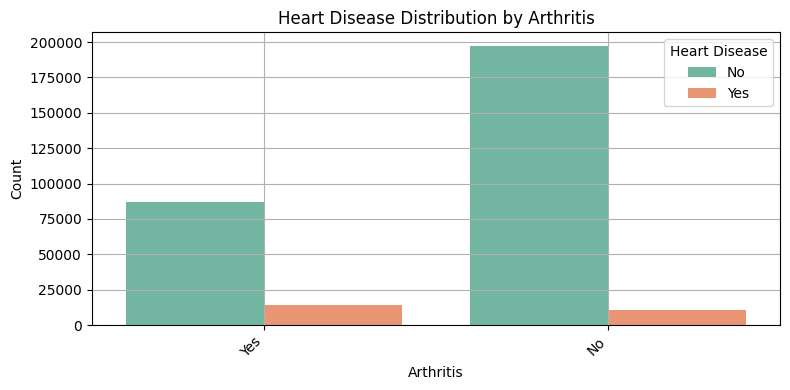

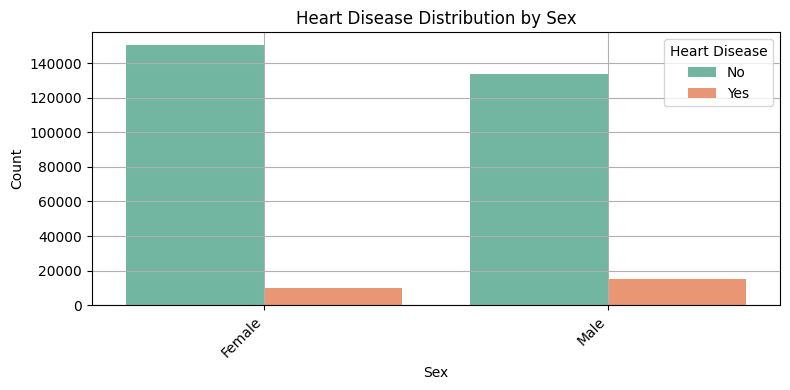

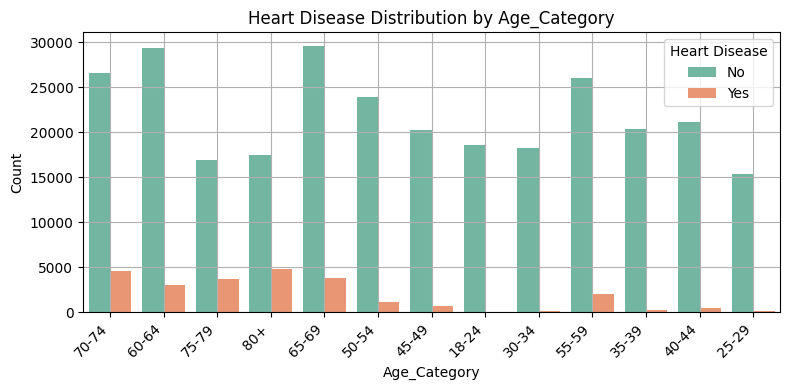

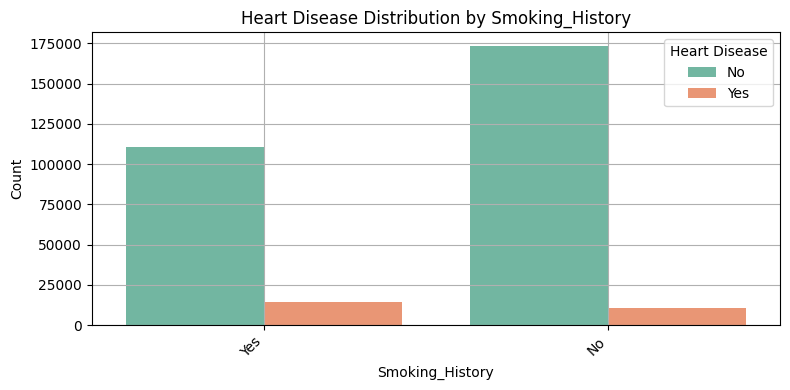

In [ ]:
#Create bar charts for each category showing heart disease distribution
heart_disease_distribution = ['General_Health', 'Checkup', 'Exercise', 'Skin_Cancer', 'Other_Cancer', 'Depression', 'Diabetes', 'Arthritis', 'Sex', 'Age_Category', 'Smoking_History']
for column in heart_disease_distribution:
    plt.figure(figsize=(8, 4))
    sns.countplot(data=cvd_df, x=column, hue='Heart_Disease', palette='Set2')
    plt.xlabel(column)
    plt.ylabel('Count')
    plt.title(f'Heart Disease Distribution by {column}')
    plt.xticks(rotation=45, ha='right')
    plt.legend(title='Heart Disease', loc='upper right', labels=['No', 'Yes'])
    plt.grid(True)
    plt.tight_layout()
    plt.show()

In [ ]:
pd.crosstab(index= cvd_df['Exercise'], columns = cvd_df['Smoking_History'])

Smoking_History,No,Yes
Exercise,,
No,35385,34084
Yes,148131,91174


In [ ]:
pd.crosstab(index = cvd_df['Exercise'], columns = cvd_df['Depression'])

Depression,No,Yes
Exercise,,
No,51172,18297
Yes,195703,43602


In [ ]:
cvd_df[['Depression', 'Alcohol_Consumption']].groupby(by = 'Depression').describe()

Alcohol_Consumption                                              
                         count      mean       std  min  25%  50%  75%   max
Depression                                                                  
No                    246875.0  5.213351  8.276447  0.0  0.0  1.0  7.0  30.0
Yes                    61899.0  4.635729  7.873130  0.0  0.0  1.0  5.0  30.0

Interestingly enough, those who have depression do not consume more alcohol than those without depression.

In [ ]:
cvd_df[['General_Health', 'Green_Vegetables_Consumption']].groupby(by = 'General_Health').describe()

Green_Vegetables_Consumption                                  \
                                      count       mean        std  min  25%   
General_Health                                                                
Excellent                           55929.0  18.120760  16.513253  0.0  8.0   
Fair                                35808.0  12.527033  14.050281  0.0  4.0   
Good                                95355.0  14.001070  14.251440  0.0  4.0   
Poor                                11331.0  11.871768  14.210108  0.0  2.0   
Very Good                          110351.0  15.711602  14.686741  0.0  5.0   

                                   
                 50%   75%    max  
General_Health                     
Excellent       12.0  30.0  120.0  
Fair             8.0  16.0  120.0  
Good            12.0  20.0  128.0  
Poor             8.0  16.0  120.0  
Very Good       12.0  20.0  120.0

Vegetable consumption does mildly vary between values of General_Health, but not by any significant amount.

In [ ]:
cvd_df[['General_Health', 'FriedPotato_Consumption']].groupby(by = 'General_Health').describe()

FriedPotato_Consumption                                     \
                                 count      mean       std  min  25%  50%   
General_Health                                                              
Excellent                      55929.0  5.846967  8.543831  0.0  1.0  4.0   
Fair                           35808.0  6.630418  9.183424  0.0  1.0  4.0   
Good                           95355.0  6.643322  8.696823  0.0  2.0  4.0   
Poor                           11331.0  6.441885  9.619598  0.0  1.0  4.0   
Very Good                     110351.0  6.103425  8.165199  0.0  2.0  4.0   

                            
                75%    max  
General_Health              
Excellent       8.0  120.0  
Fair            8.0  128.0  
Good            8.0  120.0  
Poor            8.0  120.0  
Very Good       8.0  128.0

Fried potato consumption does not seem to vary significantly with regards to general health.

Attributes vs Heart Disease

In [ ]:
pd.crosstab(index = cvd_df['Diabetes'], columns = cvd_df['Heart_Disease'])

Heart_Disease,No,Yes
Diabetes,,
No,243357,15705
"No, pre-diabetes or borderline diabetes",6102,794
Yes,31794,8376
"Yes, but female told only during pregnancy",2550,96


In [ ]:
pd.crosstab(index = cvd_df['General_Health'], columns = cvd_df['Heart_Disease'])

Heart_Disease,No,Yes
General_Health,,
Excellent,54814,1115
Fair,29019,6789
Good,86712,8643
Poor,7729,3602
Very Good,105529,4822


No apparent correlation between general health and heart disease. One thing to note is that people who claim to have excellent health have the least people who also have heart disease (only 1115 have heart disease out of the 55954 people with excellent health). In comparison, 6789 out of the 35810 people who claim to have only Fair health have heart disease. Similarly, the group of people with Poor health have a higher proportion of people with heart disease.

In [ ]:
pd.crosstab(index = cvd_df['Skin_Cancer'], columns = cvd_df['Heart_Disease'])

Heart_Disease,No,Yes
Skin_Cancer,,
No,258501,20281
Yes,25302,4690


In [ ]:
20281/(20281 + 258579)

0.0727282507351359

In [ ]:
4690/(25304 + 4690)

0.15636460625458426

A higher proportion of people with skin cancer also have heart disease than people without skin cancer who have heart disease.

In [ ]:
pd.crosstab(index = cvd_df['Smoking_History'], columns = cvd_df['Heart_Disease'])

Heart_Disease,No,Yes
Smoking_History,,
No,173129,10387
Yes,110674,14584


In [ ]:
pd.crosstab(index = cvd_df['Exercise'], columns = cvd_df['Heart_Disease'])

Heart_Disease,No,Yes
Exercise,,
No,60465,9004
Yes,223338,15967


In [ ]:
pd.crosstab(index = cvd_df['Age_Category'], columns = cvd_df['Heart_Disease'])

Heart_Disease,No,Yes
Age_Category,,
18-24,18576,94
25-29,15379,113
30-34,18224,201
35-39,20324,274
40-44,21152,435
45-49,20285,678
50-54,23909,1181
55-59,26057,1991
60-64,29397,3012


It appears older people are at higher risk of heart disease.

In [ ]:
#Convert 'Yes' into 1 and 'No' into 0
heart_disease_b = [1 if x == 'Yes' else 0 for x in cvd_df['Heart_Disease']]
cvd_df['BHeart_Disease'] = heart_disease_b

<ipython-input-58-434c5dc7f600>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cvd_df['BHeart_Disease'] = heart_disease_b


In [ ]:
print('Numerical columns correlations with heart disease: \n')
for numericali in ['Height_(cm)', 'Weight_(kg)', 'BMI', 'Alcohol_Consumption', 'Fruit_Consumption', 'Green_Vegetables_Consumption', 'FriedPotato_Consumption']:
    print(f'{numericali}: {cvd_df[numericali].corr(cvd_df.BHeart_Disease)}')

Numerical columns correlations with heart disease: 

Height_(cm): 0.015782811207270278
Weight_(kg): 0.04585433539691101
BMI: 0.04264179138652555
Alcohol_Consumption: -0.036614009470349686
Fruit_Consumption: -0.020044951707852934
Green_Vegetables_Consumption: -0.02402740851904829
FriedPotato_Consumption: -0.009248765715627338


As they are, without any scaling or modifications applied, the numerical columns don't have any strong relationship with heart disease.

Furthermore, the summary statistics of each numerical column grouped by heart disease do not reveal anything interesting either. There is no significant variation between those with heart disease and those without heart disease with regards to each numerical column.

**Interesting relationships between features and the class we are trying to predict (or cluster):**

**Findings:**

*   When plotting the counts of heart disease for alcohol consumption, fruit consumption, vegetable consumption, and fried potato consumption, we see that all four distributions are right skewed, which shows that those who consumed lesser amounts of each category tended to have heart disease. Frequent consumption of alcohol and fried potato is generally associated with unhealthy lifestyles, which in turn are associated with health issues such as heart disease; however, the distribution plotted above do not show strong evidence for this association. An interesting finding is that there was a large count of heart disease for those who consumed fruit with a score of 20-40. Although fruits are healthy foods and would not seem to be a contributing factor to heart disease, some fruits contain large amounts of sugar, so eating too much fruit can possibly be harmful. Nevertheless, through analyzing these variables, we can understand some interesting relationships with heart disease.
*   When plotting the counts of heart disease for BMI, we see an approximately normal distribution centered around 25, although there is a slight right skew. A healthy BMI according to the CDC is between 18.5 and 24.9, with higher values indicating an overweight measure and lower values meaning an underweight measure. Since there is a slight right skew, this shows that there are more individuals who are overweight with heart disease and less individuals who are underweight with heart disease. This is an interesting and important finding because higher BMI's may be a contributing factor to trying to predict heart disease.
*   When plotting general health against food consumption, we see that those who consider themselves as having poor health tend to eat less fruits and vegetables but more fried potato. Those who consider themselves as having better than fair health tend to eat more fruits and vegetables. Although this comparison does not directly indicate any relationship with heart disease, this helps us to better understand the relationship between the features.
*   When plotting age category against food consumption, we see that those who are older tend to eat more fruits and vegetables and less fried potato compared to younger individuals. Although this comparison does not directly indicate any relationship with heart disease, this helps us to better understand the lifestyle habits of the different age categories.
*   When plotting a stacked bar chart that shows a comparison between heart disease and exercise, we see that a good majority of those who do not have heart disease exercise. Lack of physical activity is often a cause associated with heart disease, and since this visualization supports that those who exercise tend to not have heart disease, we could use exercise as a feature to predict heart disease.
*   When plotting stacked bar charts to show comparisons between heart disease, skin cancer, any other cancer, diabetes, and depression, we seem to see that skin cancer, any other cancer, diabetes, and depression are factors that aren't associated with causing heart disease since those with heart disease often do not experience any of these other health issues. This is a rather surprising finding because diabetes is an often associated cause of heart disease. The fact that the data does not show a relationship between having diabetes and heart disease is surprising, so we need to be cautious when trying to use diabetes to predict heart disease.
*   When plotting a stacked bar chart to show a comparison between heart disease and arthritis, we see that of those who have heart disease, over half of those individuals have arthritis. This indicates that arthritis could be a contributing factor to heart disease, so this is a key finding that needs to be kept in mind when predicting heart disease.
*   When plotting a stacked bar chart to show a comparison between heart disease and smoking history, we see that of those who have heart disease, over half of those individuals have a smoking history. This indicates that smoking history could be a contributing factor to heart disease, so this is a key finding that needs to be kept in mind when predicting heart disease.

*When plotting side-by-side bar charts showing heart disease against 'General_Health', 'Checkup', 'Exercise', 'Skin_Cancer', 'Other_Cancer', 'Depression', 'Diabetes', 'Arthritis', 'Sex', 'Age_Category', 'Smoking_History', we can make the following conclusions:*

*   Heart disease tends to be more common for those who rate their health as "poor" or "fair"
*   Those who do not exercise have more occurrences of having heart disease
*   Skin cancer, any other cancer, and depression do not seem to show any evidence of being contributing factors to heart disease
*   Of those who have heart disease, diabetes turns out to be a slight contributing factor
*   There are more males with heart disease than females with heart disease (*there are more females than males surveyed in this data)
*   Those who are 60 and above tend to have higher occurrences of heart disease
*   Heart disease has higher prevalence in smokers compared to non-smokers





**Other features that could be added to the data or created from existing features:**



*   One feature that could be added to the data is exercise frequency. Knowing just if an individual exercises does not give any useful information as to their physical activity level. If we knew individuals' exercise frequency, such as "sedentary", "active", "very active", this could maybe help us to find stronger relationships to the variable we are trying the predict (heart disease).
*   Another feature that could be added is the actual age of each of the individuals. Because we are given only age categories, we do not know the exact age of the respondents in the survey. Knowing the exact age of the respondents is more useful since we are given more specific information we could use in our analyses.
*   A feature that could be created from existing features is BMI category. We can do some research and identify categories of BMI ranges such as "Underweight", "Normal Weight", "Overweight", and "Obese", and classify the individuals to each of these categories. Classifying individuals into these categories might be more informative as to their health status.
*   Another feature that could be created from existing features is combining the 'Fruit_Consumption' and 'Green_Vegetables_Consumption' categories. The combined scores of these two categories could provide interesting information and analysis to relationship with other features.

*Other features that can be added or created from existing features include:*

*   Healthy Lifestyle Score (combining columns such as 'Exercise', 'BMI', and consumption of the other food categories)
*   Combined Health Score (figure out a score based on if an individual has 'Heart_Disease', 'Skin_Cancer', 'Other_Cancer', 'Depression', 'Diabetes', or 'Arthritis')
*   Other health measurements (high blood pressure, cholesterol, diet high in sodium, sugar, fat, etc.)
*   Family history of heart disease
*   Family history of stroke
*   Other common causes associated with heart disease (would have to research more)




## Additional EDA

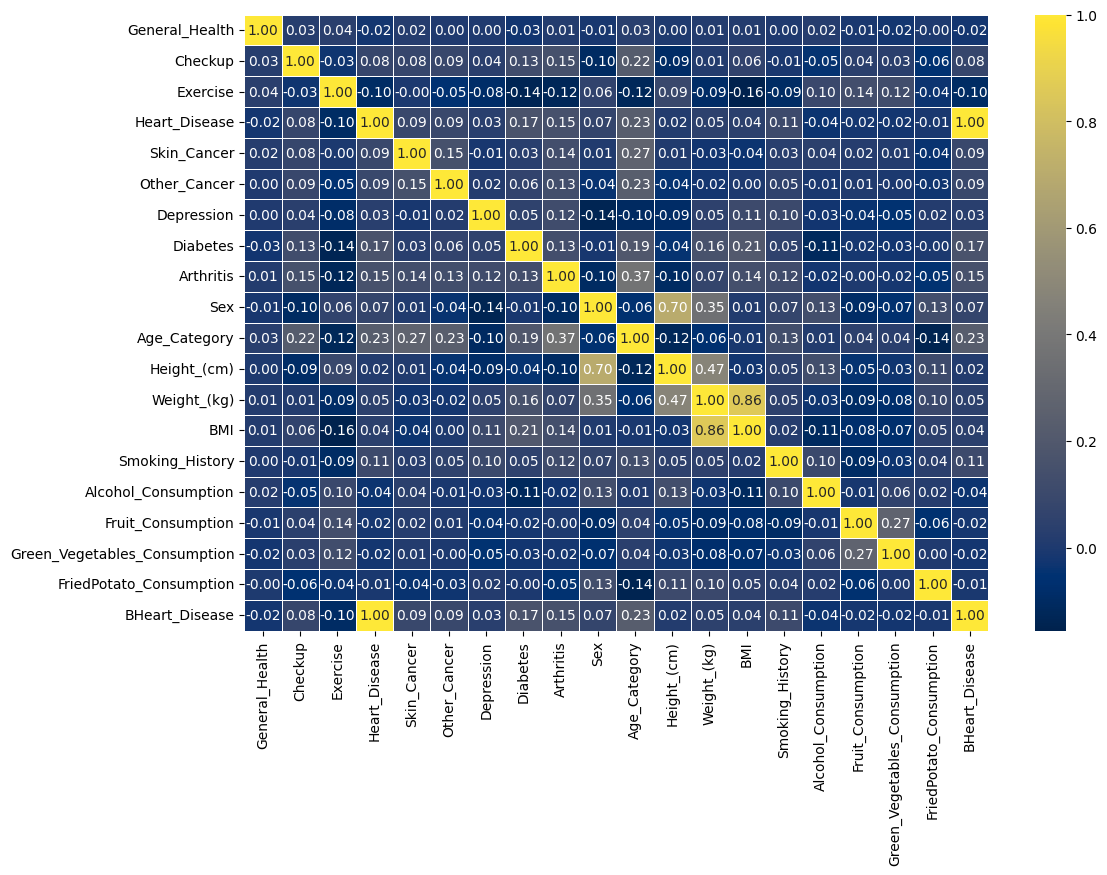

In [ ]:
#Create a copy of the DataFrame
cvd_df_copy = cvd_df.copy()

#Convert categorical variables into numerical variables
cvd_df_copy = cvd_df_copy.apply(lambda x: x.astype('category').cat.codes if x.dtype == 'object' else x)

#Calculate r (correlation coefficient)
r = cvd_df_copy.corr()

#Plot the correlations in a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(r, annot=True, fmt=".2f", cmap='cividis', cbar=True, linewidths=0.5)
plt.show()

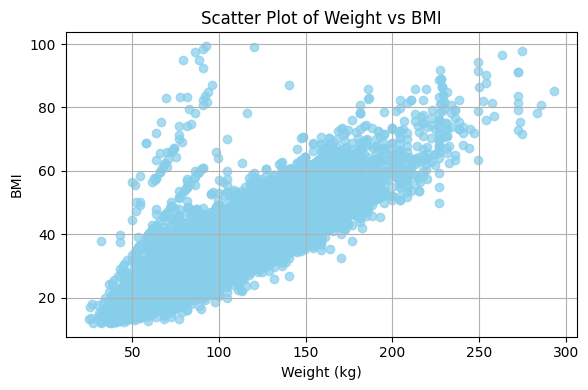

In [ ]:
#Scatter plot of 'Weight_(kg)' vs 'BMI'
plt.figure(figsize=(6, 4))
plt.scatter(cvd_df['Weight_(kg)'], cvd_df['BMI'], color='skyblue', alpha=0.7)
plt.xlabel('Weight (kg)')
plt.ylabel('BMI')
plt.title('Scatter Plot of Weight vs BMI')
plt.grid(True)

plt.tight_layout()
plt.show()

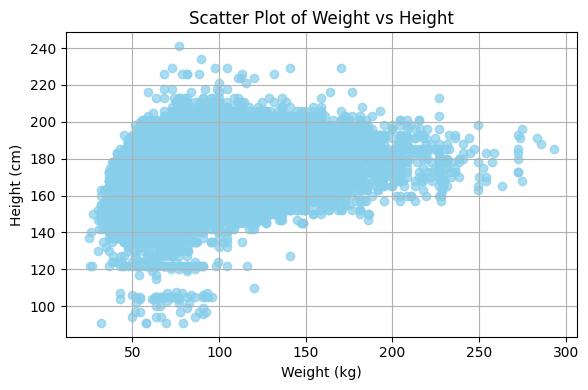

In [ ]:
#Scatter plot of 'Weight_(kg)' vs 'Height_(cm)'
plt.figure(figsize=(6, 4))
plt.scatter(cvd_df['Weight_(kg)'], cvd_df['Height_(cm)'], color='skyblue', alpha=0.7)
plt.xlabel('Weight (kg)')
plt.ylabel('Height (cm)')
plt.title('Scatter Plot of Weight vs Height')
plt.grid(True)

plt.tight_layout()
plt.show()

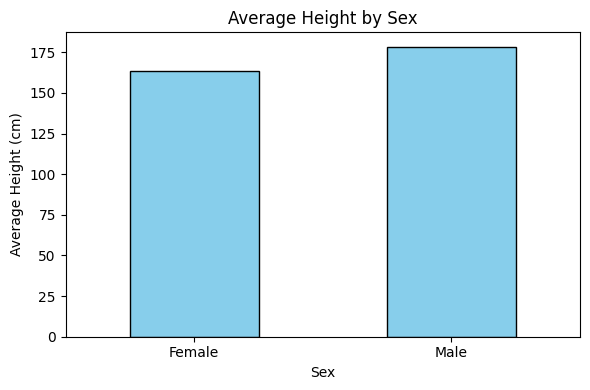

In [ ]:
#Calculate the average height for each sex
average_height_by_sex = cvd_df.groupby('Sex')['Height_(cm)'].mean()

#Create a bar chart
plt.figure(figsize=(6, 4))
average_height_by_sex.plot(kind='bar', color='skyblue', edgecolor='black')

#Set labels and title
plt.xlabel('Sex')
plt.ylabel('Average Height (cm)')
plt.title('Average Height by Sex')
plt.xticks(rotation=0)

plt.tight_layout()
plt.show()

<Figure size 1000x600 with 0 Axes>

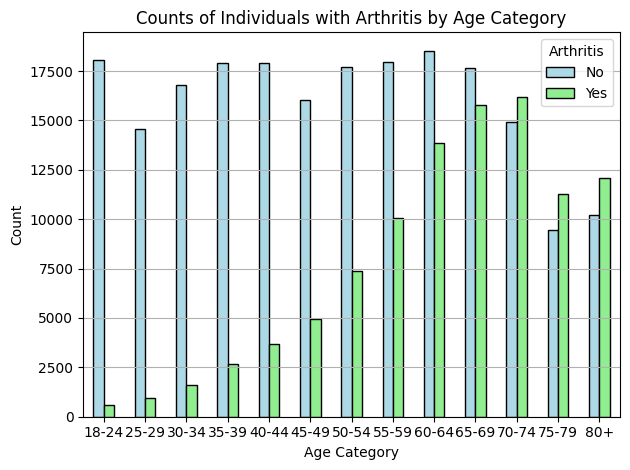

In [ ]:
#Calculate the counts of individuals with arthritis for each age category
arthritis_by_age_category = pd.crosstab(cvd_df['Age_Category'], cvd_df['Arthritis'])

#Create a bar chart
plt.figure(figsize=(10, 6))
arthritis_by_age_category.plot(kind='bar', color=['lightblue', 'lightgreen'], edgecolor='black')

#Set labels and title
plt.xlabel('Age Category')
plt.ylabel('Count')
plt.title('Counts of Individuals with Arthritis by Age Category')
plt.xticks(rotation=0)
plt.legend(title='Arthritis', labels=['No', 'Yes'])
plt.grid(axis='y')

plt.tight_layout()
plt.show()

<Figure size 1000x600 with 0 Axes>

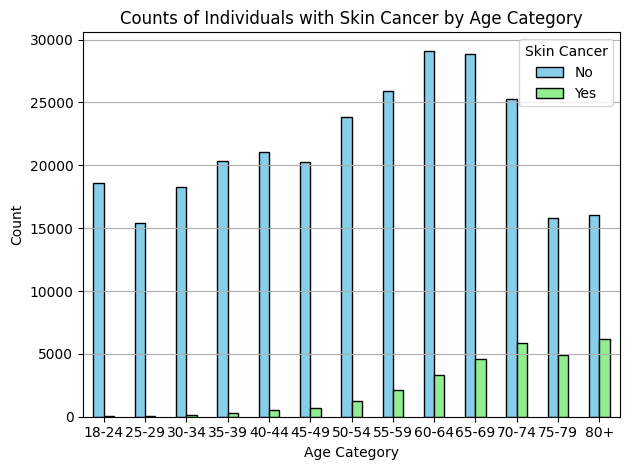

In [ ]:
#Calculate the counts of individuals with skin cancer for each age category
skin_cancer_by_age_category = pd.crosstab(cvd_df['Age_Category'], cvd_df['Skin_Cancer'])

#Create a bar chart
plt.figure(figsize=(10, 6))
skin_cancer_by_age_category.plot(kind='bar', color=['skyblue', 'lightgreen'], edgecolor='black')

#Set labels and title
plt.xlabel('Age Category')
plt.ylabel('Count')
plt.title('Counts of Individuals with Skin Cancer by Age Category')
plt.xticks(rotation=0)
plt.legend(title='Skin Cancer', labels=['No', 'Yes'])
plt.grid(axis='y')

plt.tight_layout()
plt.show()

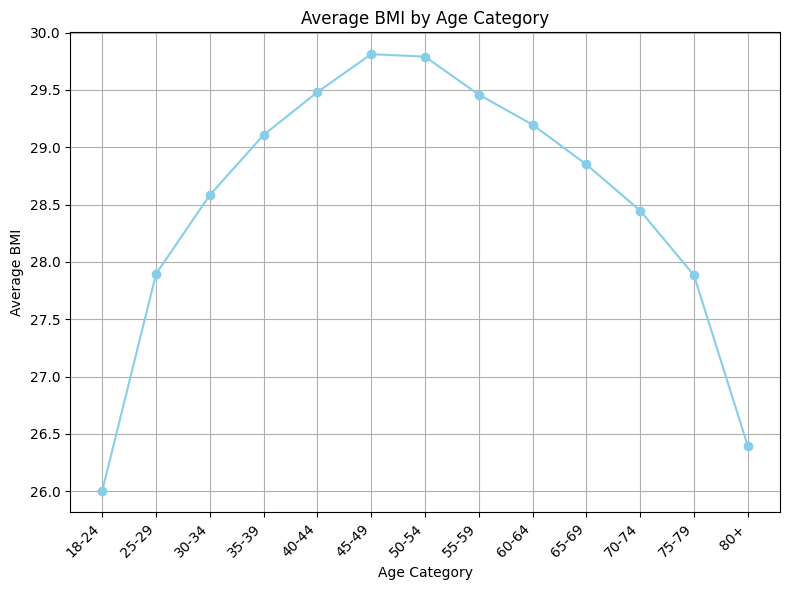

In [ ]:
#Group the data by 'Age_Category' and calculate the average BMI for each group
average_bmi_by_age = cvd_df.groupby('Age_Category')['BMI'].mean()

#Line chart for average BMI by age category
plt.figure(figsize=(8, 6))
plt.plot(average_bmi_by_age.index, average_bmi_by_age.values, marker='o', color='skyblue', linestyle='-')
plt.xlabel('Age Category')
plt.ylabel('Average BMI')
plt.title('Average BMI by Age Category')
plt.xticks(rotation=45, ha='right')  #Rotate x-axis labels
plt.grid(True)

plt.tight_layout()
plt.show()

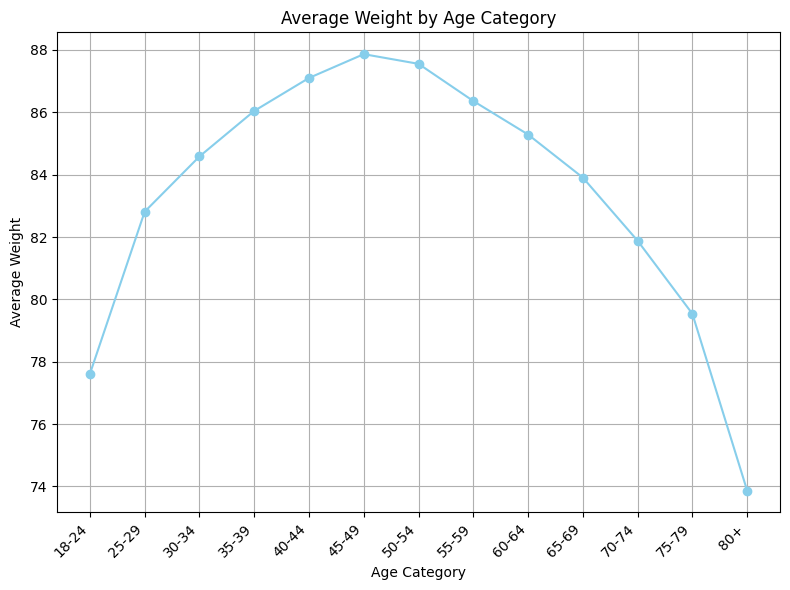

In [ ]:
#Group the data by 'Age_Category' and calculate the average weight for each group
average_weight_by_age = cvd_df.groupby('Age_Category')['Weight_(kg)'].mean()

#Line chart for average weight by age category
plt.figure(figsize=(8, 6))
plt.plot(average_weight_by_age.index, average_weight_by_age.values, marker='o', color='skyblue', linestyle='-')
plt.xlabel('Age Category')
plt.ylabel('Average Weight')
plt.title('Average Weight by Age Category')
plt.xticks(rotation=45, ha='right')  #Rotate x-axis labels
plt.grid(True)

plt.tight_layout()
plt.show()

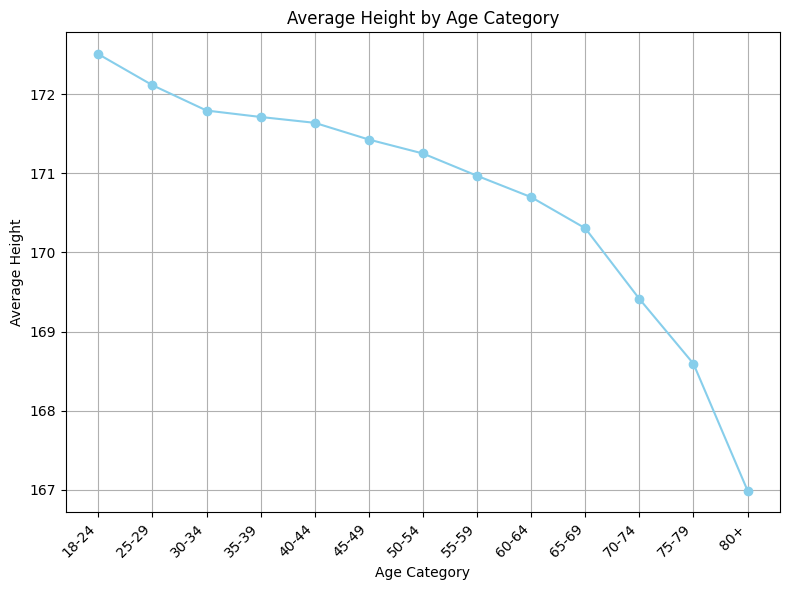

In [ ]:
#Group the data by 'Age_Category' and calculate the average height for each group
average_height_by_age = cvd_df.groupby('Age_Category')['Height_(cm)'].mean()

#Line chart for average height by age category
plt.figure(figsize=(8, 6))
plt.plot(average_height_by_age.index, average_height_by_age.values, marker='o', color='skyblue', linestyle='-')
plt.xlabel('Age Category')
plt.ylabel('Average Height')
plt.title('Average Height by Age Category')
plt.xticks(rotation=45, ha='right')  #Rotate x-axis labels
plt.grid(True)

plt.tight_layout()
plt.show()

**Findings:**

*Because I already analyzed interesting relationships between features and the class I am trying to predict (heart disease), to engage in additional analysis, I created a heatmap to show the correlation between all the features in my dataset. Correlations closer to 1 indicate a strong positive relationship and correlations closer to -1 indicate a strong negative relationship while correlations around 0 indicate no relationship. I then chose among stronger correlations to further visualize the relationships between those features.*

*   Weight and BMI have a strong positive correlation of 0.86. When plotting Weight against BMI in a scatter plot, we indeed see a strong positive relationship. This means that individuals who are heavier have higher BMIs, which makes sense considering BMI categories range from "Underweight", "Normal Weight", "Overweight", to "Obese".
*   Weight and Height have a moderate positive correlation of 0.47. When plotting Weight against Height in a scatter plot, we see a slight, moderate positive relationship.
*   Height and Sex have a relatively strong positive correlation of 0.70. When plotting Height vs Sex in a bar chart, we see that males tend to be taller than females. Weight and Sex, however, have a weaker correlation of 0.35. BMI and Sex have basically no correlation at all.
*   Age category and arthritis have a moderately weak positive correlation of 0.37. When plotting a bar chart to show the counts of those with arthritis for each age category, we see that the older age categories tend to have more counts of individuals with arthritis.
*   Age category and skin cancer have a moderately weak positive correlation of 0.27. When plotting a bar chart to show the counts of those with skin cancer for each age category, we see that the older age categories tend to have more counts of individuals with skin cancer.

*Other interesting findings:*

*   Although BMI and age category have a correlation coefficient of -0.01, indicating no correlation at all, when visualizing the average BMI for each age category in a line chart, we see a quadratic parabola relationship that opens down. This indicates that average BMI values tend to increase to a certain point with age but then start decreasing.
*   Although Weight and age category have a correlation coefficient of -0.06, indicating no correlation at all, when visualizing the average weight for each age category in a line chart, we see a quadratic parabola relationship that opens down. This indicates that average weight values tend to increase to a certain point with age but then start decreasing.
*   Although Height and age category have a correlation coefficient of -0.12, indicating basically no correlation at all, when visualizing the average height for each age category in a line chart, we see that height tends to decrease as individuals get older, which is an interesting finding.



Works Cited



*   https://www.kaggle.com/datasets/alphiree/cardiovascular-diseases-risk-prediction-dataset
*   https://www.cdc.gov/healthyweight/assessing/index.html#:~:text=If%20your%20BMI%20is%20less,falls%20within%20the%20obese%20range.
*   https://www.cdc.gov/chronicdisease/resources/publications/factsheets/heart-disease-stroke.htm#:~:text=Leading%20risk%20factors%20for%20heart,unhealthy%20diet%2C%20and%20physical%20inactivity.

# Final Project Part 2: Modeling and Evaluation

## Modeling

**Explanation of the Evaluation Metrics We Will Use:**

We will use a mix of accuracy, precision, recall, and F1 score to analyze the results of our modeling; more specifically, we will put a great emphasis on using F1-score not only because it aggregates precision and recall, but also because the researchers in the research paper published along with our dataset used F1-score to access their models. We hope to use their results, such as their F1-scores, as benchmarks, so we can compare the effectiveness of our models and our results to the researchers' results. To measure the effectiveness of a good prediction algorithm and other supervised learning approaches, we can look at accuracy, which is the proportion of correctly predicted instances over the total number of instances; precision, which measures the proportion of true positives over all the predicted positive cases; recall, which measures the proportion of true positives over all actual positive cases and true negatives over all actual negative cases; and F1 score, which is the harmonic mean of precision and recall. Particularly looking at precision, recall, and F1-score is important especially given the fact that we are trying to predict heart disease, and understanding for example, how higher precision indicates fewer false positives, how higher recall indicates fewer false negatives, and how looking at F1-score can help us to consider both false positives and false negatives can help us to analyze our results. These evaluation metrics are appropriate for analyzing the results of our modeling because they give us a well-rounded and comprehensive understanding of our models' performance. A combination of these metrics helps us to make informed decisions on how we can improve, tune, and deploy our models.

**Explanation of Our Train-Test Split Methodology:**

The methods we will use for dividing our data into training and testing splits include a simple Train-Test Split approach and Stratified K-Fold Cross-Validation. The Train-Test Split method is appropriate since we have a sufficient amount of data (308,854 records), and it is simple to implement; however, a drawback to using this method is that it may result in high variance due to the randomness of the split. A better, more appropriate method we will use is Stratified k-fold cross validation. By using this method, we will attempt to ensure that each fold will have a similar distribution of classes as the whole dataset. Using Stratified k-fold cross validation is appropriate in our case since our dataset may be imbalanced, so the method will help to reduce the risk of overfitting on imbalanced classes. The research article published on our dataset used Stratified 10-fold cross validation to ensure a balanced evaluation of their models, so we will attempt to do the same in our project. We will use stratified 10-fold cross validation when building KNN (too time-costly with more folds), but for Random Forest and Naive Bayes, we will test using 5-fold, 10-fold, 15-fold, and 20-fold. It is important to note, however, that for our feature importances, we used a normal train test split.

Before we even divided our data into training and testing splits and built all of our models, we had to do some preprocessing. We one-hot-encoded all of our cateogorical features using the pandas get_dummies() method. After we one-hot-encoded all of the necessary columns, we went from having 19 columns in our dataset to having 39 columns. Since the column "Heart_Disease" is our target, we actually have 38 features and 39 columns in total.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import  cross_val_score, cross_validate
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
import sklearn.metrics
import torch
import math
import statistics

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report, accuracy_score
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.preprocessing import MinMaxScaler, LabelEncoder, OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import NearestNeighbors

In [ ]:
from google.colab import files
files.upload()

Saving CVD_cleaned.csv to CVD_cleaned.csv


In [ ]:
df = pd.read_csv("CVD_cleaned.csv")

In [ ]:
df.head()

,General_Health,Checkup,Exercise,Heart_Disease,Skin_Cancer,Other_Cancer,Depression,Diabetes,Arthritis,Sex,Age_Category,Height_(cm),Weight_(kg),BMI,Smoking_History,Alcohol_Consumption,Fruit_Consumption,Green_Vegetables_Consumption,FriedPotato_Consumption
0,Poor,Within the past 2 years,No,No,No,No,No,No,Yes,Female,70-74,150.0,32.66,14.54,Yes,0.0,30.0,16.0,12.0
1,Very Good,Within the past year,No,Yes,No,No,No,Yes,No,Female,70-74,165.0,77.11,28.29,No,0.0,30.0,0.0,4.0
2,Very Good,Within the past year,Yes,No,No,No,No,Yes,No,Female,60-64,163.0,88.45,33.47,No,4.0,12.0,3.0,16.0
3,Poor,Within the past year,Yes,Yes,No,No,No,Yes,No,Male,75-79,180.0,93.44,28.73,No,0.0,30.0,30.0,8.0
4,Good,Within the past year,No,No,No,No,No,No,No,Male,80+,191.0,88.45,24.37,Yes,0.0,8.0,4.0,0.0


Preprocess Dataset

In [ ]:
scoring = ['precision', 'recall', 'f1', 'accuracy']

In [ ]:
df['Exercise'] = [0 if val == 'No' else 1 for val in df['Exercise']]
df['Heart_Disease'] = [0 if val == 'No' else 1 for val in df['Heart_Disease']]
df['Skin_Cancer'] = [0 if val == 'No' else 1 for val in df['Skin_Cancer']]
df['Other_Cancer'] = [0 if val == 'No' else 1 for val in df['Other_Cancer']]
df['Depression'] = [0 if val == 'No' else 1 for val in df['Depression']]
df['Diabetes'] = [0 if val == 'No' else 1 for val in df['Diabetes']]
df['Arthritis'] = [0 if val == 'No' else 1 for val in df['Arthritis']]
df['Smoking_History'] = [0 if val == 'No' else 1 for val in df['Smoking_History']]
df['Sex'] = [0 if val == 'Female' else 1 for val in df['Sex']]

In [ ]:
ohedf = pd.get_dummies(df)

In [ ]:
ohedf.columns

Index(['Exercise', 'Heart_Disease', 'Skin_Cancer', 'Other_Cancer',
       'Depression', 'Diabetes', 'Arthritis', 'Sex', 'Height_(cm)',
       'Weight_(kg)', 'BMI', 'Smoking_History', 'Alcohol_Consumption',
       'Fruit_Consumption', 'Green_Vegetables_Consumption',
       'FriedPotato_Consumption', 'General_Health_Excellent',
       'General_Health_Fair', 'General_Health_Good', 'General_Health_Poor',
       'General_Health_Very Good', 'Checkup_5 or more years ago',
       'Checkup_Never', 'Checkup_Within the past 2 years',
       'Checkup_Within the past 5 years', 'Checkup_Within the past year',
       'Age_Category_18-24', 'Age_Category_25-29', 'Age_Category_30-34',
       'Age_Category_35-39', 'Age_Category_40-44', 'Age_Category_45-49',
       'Age_Category_50-54', 'Age_Category_55-59', 'Age_Category_60-64',
       'Age_Category_65-69', 'Age_Category_70-74', 'Age_Category_75-79',
       'Age_Category_80+'],
      dtype='object')

In [ ]:
ohedf.to_csv("encoded_df.csv")

In [ ]:
X = ohedf.drop(columns = ["Heart_Disease"])

In [ ]:
y = ohedf["Heart_Disease"]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

KNN



In [ ]:
kn_prec=[]
kn_rec=[]
kn_f1=[]
kn_acc=[]
kn_results=[]
for i in range(5, 31, 5):
  print(f'i:{i} ')
  knn = KNeighborsClassifier(n_neighbors = i)
  kn_results.append(cross_validate(knn, X, y, cv = 10, scoring = scoring))

i:5 
i:10 
i:15 
i:20 


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defin

i:25 


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defin

i:30 


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defin

The Undefined Metric Warning we are getting for precision indicates that we are not getting any positive predictions at all, leading to a division by zero error. Scikitlearn handles this error for us, simply setting the precision to zero.

What we can learn from this is that our model is very overfit. Also considering the distribution of the data, it is possible that the severe class imbalances make an impact as well. Due to the number of negative CVDs greatly outnumbering the number of positive CVDs, at large numbers of neighbors you might never have enough neighbors to make a positive prediction.

In [ ]:
knfp = KNeighborsClassifier()
knfp.fit(X_train, y_train)

KNeighborsClassifier()

In [ ]:
vars(knfp)

{'n_neighbors': 5,
 'radius': None,
 'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'p': 2,
 'n_jobs': None,
 'weights': 'uniform',
 'feature_names_in_': array(['Exercise', 'Skin_Cancer', 'Other_Cancer', 'Depression',
        'Diabetes', 'Arthritis', 'Sex', 'Height_(cm)', 'Weight_(kg)',
        'BMI', 'Smoking_History', 'Alcohol_Consumption',
        'Fruit_Consumption', 'Green_Vegetables_Consumption',
        'FriedPotato_Consumption', 'General_Health_Excellent',
        'General_Health_Fair', 'General_Health_Good',
        'General_Health_Poor', 'General_Health_Very Good',
        'Checkup_5 or more years ago', 'Checkup_Never',
        'Checkup_Within the past 2 years',
        'Checkup_Within the past 5 years', 'Checkup_Within the past year',
        'Age_Category_18-24', 'Age_Category_25-29', 'Age_Category_30-34',
        'Age_Category_35-39', 'Age_Category_40-44', 'Age_Category_45-49',
        'Age_Category_50-54', 'Age_Category_55-59', 'Ag

In [ ]:
knresdf = pd.DataFrame(kn_results)

In [ ]:
knresdf.to_csv("./knn_results_.csv")

In [ ]:
knresdf

,fit_time,score_time,test_precision,test_recall,test_f1,test_accuracy
0,"[0.1590418815612793, 0.13961291313171387, 0.14...","[58.28868532180786, 61.15336084365845, 58.1331...","[0.18232044198895028, 0.2215909090909091, 0.19...","[0.013215859030837005, 0.015618742490989187, 0...","[0.024645257654966394, 0.029180695847362513, 0...","[0.9154309395842777, 0.9159813507738134, 0.915..."
1,"[0.14502978324890137, 0.19968914985656738, 0.1...","[76.2801513671875, 80.5603518486023, 79.379000...","[0.0, 0.5, 0.6666666666666666, 0.3333333333333...","[0.0, 0.00040048057669203043, 0.00160192230676...","[0.0, 0.0008003201280512204, 0.003196164602477...","[0.9190571780094541, 0.9191543093958428, 0.919..."
2,"[0.13793706893920898, 0.14387035369873047, 0.1...","[80.3075098991394, 76.13966464996338, 72.77245...","[0.0, 0.0, 1.0, 0.6, 0.0, 1.0, 1.0, 0.66666666...","[0.0, 0.0, 0.0008009611533840609, 0.0012009607...","[0.0, 0.0, 0.0016006402561024409, 0.0023971234...","[0.9190895551382503, 0.9191219322670465, 0.919..."
3,"[0.14335966110229492, 0.14502644538879395, 0.2...","[68.57816767692566, 66.72301936149597, 70.7134...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.9191543093958428, 0.9191543093958428, 0.919..."
4,"[0.135420560836792, 0.2024097442626953, 0.2098...","[71.12220215797424, 69.03883123397827, 69.4477...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.9191543093958428, 0.9191543093958428, 0.919..."
5,"[0.1486678123474121, 0.21346306800842285, 0.19...","[72.2746033668518, 70.86983895301819, 78.15308...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.9191543093958428, 0.9191543093958428, 0.919..."


In [ ]:
knp = []
knr = []
knf1 = []
knacc = []
for ind, foldnum in knresdf.iterrows():
  #print(type((foldnum['test_accuracy'])))
  knacc.append(statistics.mean(foldnum['test_accuracy']))
  knf1.append(statistics.mean(foldnum['test_f1']))
  knr.append(statistics.mean(foldnum['test_recall']))
  knp.append(statistics.mean(foldnum['test_precision']))

In [ ]:
meanknres = pd.DataFrame()

In [ ]:
meanknres['num_neighbors'] = [5,10,15,20,25,30]
meanknres['Precision'] = knp
meanknres['Recall'] = knr
meanknres['f1'] = knf1
meanknres['Accuracy'] = knacc

In [ ]:
meanknres

,num_neighbors,Precision,Recall,f1,Accuracy
0,5,0.174976,0.013135,0.024428,0.915206
1,10,0.375000,0.000761,0.001518,0.919111
2,15,0.486667,0.000561,0.001120,0.919162
3,20,0.000000,0.000000,0.000000,0.919146
4,25,0.000000,0.000000,0.000000,0.919146
5,30,0.000000,0.000000,0.000000,0.919150


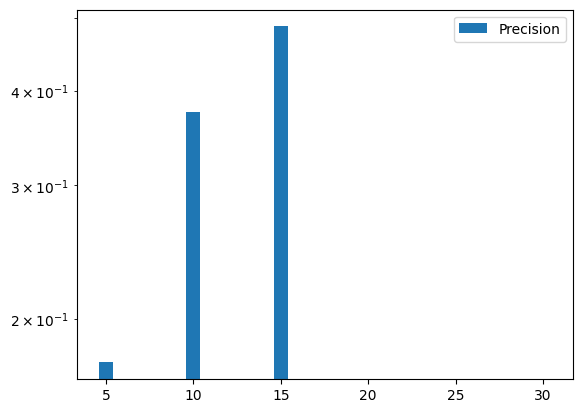

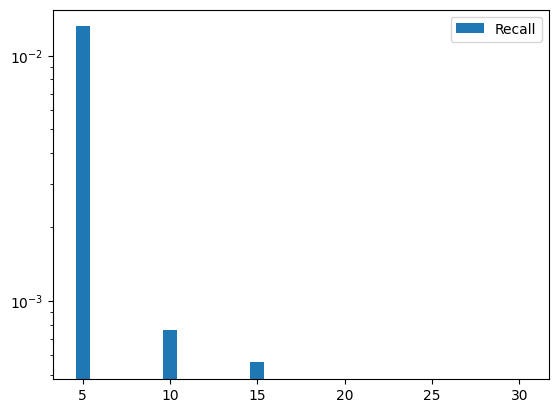

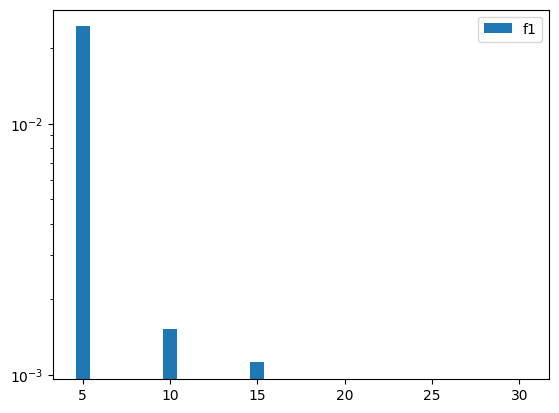

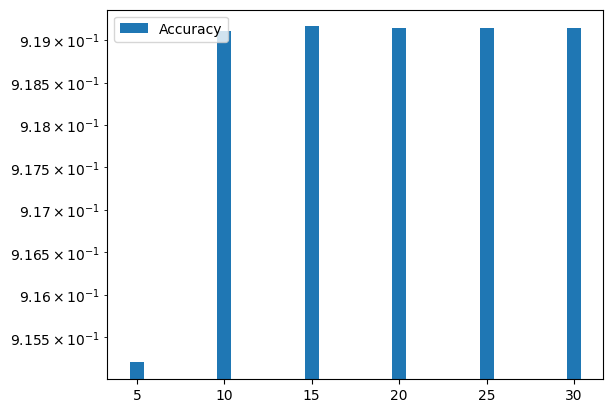

In [ ]:
plt.yscale("log")
#plt.ylim(bottom = 0.1)
xticks = [5,10,15,20, 25, 30]
plt.xticks(xticks)
plt.bar(x = [x for x in xticks], height = knp, label = "Precision")
plt.legend()
plt.show()

plt.yscale("log")
plt.xticks(xticks)
plt.bar(x = [x for x in xticks], height = knr, label = "Recall")
plt.legend()
plt.show()

plt.yscale("log")
plt.xticks(xticks)
plt.bar(x = [x for x in xticks], height = knf1, label = "f1")
plt.legend()
plt.show()

plt.yscale("log")
plt.xticks(xticks)
plt.bar(x = [x for x in xticks], height = knacc, label = "Accuracy")
plt.legend()
plt.show()

Random Forest

In [ ]:
rfseed = 42
rf = RandomForestClassifier(random_state = rfseed)

rfres=[]
for i in range(5, 21, 5):
  print(f'fold: {i}')
  rfres.append(cross_validate(rf, X, y, cv = i, scoring = scoring))

fold: 5
fold: 10
fold: 15
fold: 20


In [ ]:
rf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [ ]:
rfimp = rf.feature_importances_

In [ ]:
rfp = []
rfr = []
rff1 = []
rfacc = []
for foldnum in rfres:
  rfacc.append(statistics.mean(foldnum['test_accuracy']))
  rff1.append(statistics.mean(foldnum['test_f1']))
  rfr.append(statistics.mean(foldnum['test_recall']))
  rfp.append(statistics.mean(foldnum['test_precision']))

In [ ]:
meanrfres = pd.DataFrame()
meanrfres['Precision'] = rfp
meanrfres['Recall'] = rfr
meanrfres['f1'] = rff1
meanrfres['Accuracy'] = rfacc
meanrfres['num_folds'] = [5,10,15,20]

In [ ]:
meanrfres

,Precision,Recall,f1,Accuracy,num_folds
0,0.432149,0.042569,0.077477,0.918071,5
1,0.443688,0.043811,0.079734,0.918246,10
2,0.440718,0.045332,0.082045,0.918113,15
3,0.441918,0.045132,0.081760,0.918143,20


In [ ]:
meanrfres.to_csv("meanrf.csv")

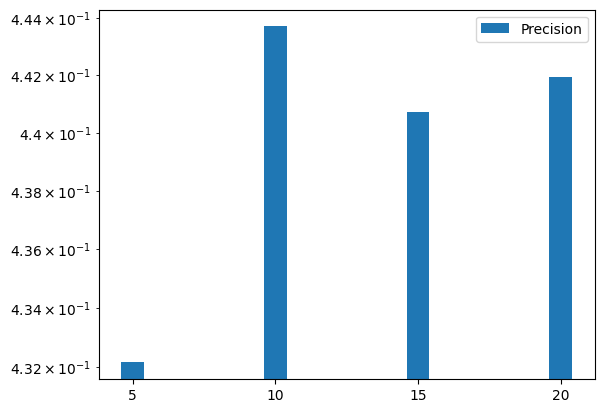

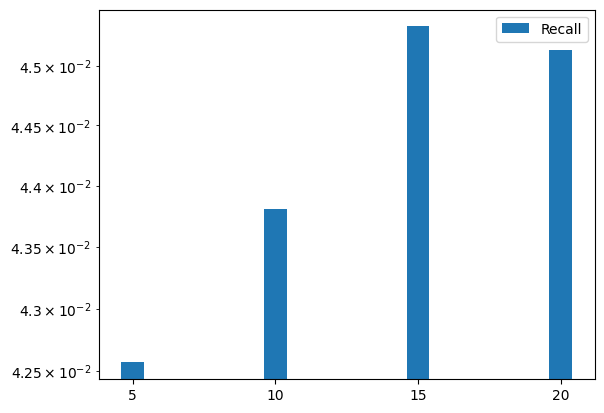

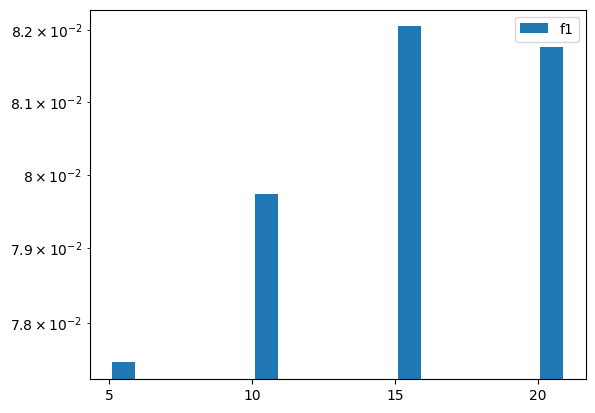

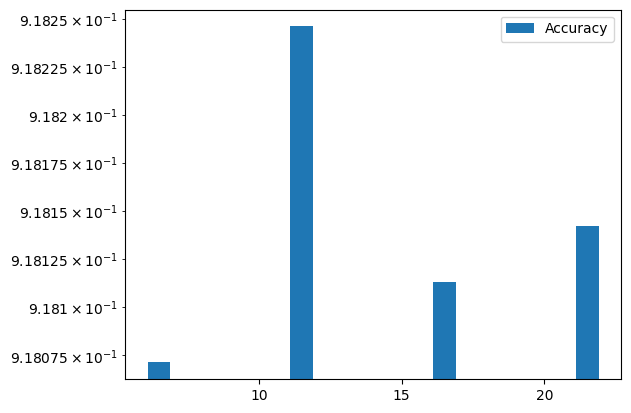

In [ ]:
plt.yscale("log")
#plt.ylim(bottom = 0.1)
xticks = [5,10,15,20]
plt.xticks(xticks)
plt.bar(x = [x for x in xticks], height = rfp, label = "Precision")
plt.legend()
plt.show()

plt.yscale("log")
plt.xticks(xticks)
plt.bar(x = [x for x in xticks], height = rfr, label = "Recall")
plt.legend()
plt.show()

plt.yscale("log")
plt.xticks(xticks)
plt.bar(x = [x+0.5 for x in xticks], height = rff1, label = "f1")
plt.legend()
plt.show()

plt.yscale("log")
plt.xticks(xticks)
plt.bar(x = [x+1.5 for x in xticks], height = rfacc, label = "Accuracy")
plt.legend()
plt.show()

Naive Bayes

In [ ]:
nb = MultinomialNB()

results = []

#nb.fit(X, y)
for i in range(5, 21, 5):
  print(f"Folds: {i}")
  results.append(cross_validate(nb, X, y, cv = i, scoring = scoring))
  #print(cross_val_scor(nb, X, y, cv = i))

Folds: 5
Folds: 10
Folds: 15
Folds: 20


In [ ]:
precision = []
recall = []
f1 = []
accuracy = []
for foldnum in results:
  accuracy.append(statistics.mean(foldnum['test_accuracy']))
  f1.append(statistics.mean(foldnum['test_f1']))
  recall.append(statistics.mean(foldnum['test_recall']))
  precision.append(statistics.mean(foldnum['test_precision']))

In [ ]:
meannbres = pd.DataFrame()
meannbres['Precision'] = precision
meannbres['Recall'] = recall
meannbres['f1'] = f1
meannbres['Accuracy'] = accuracy
meannbres['num_folds'] = [5,10,15,20]

In [ ]:
meannbres

,Precision,Recall,f1,Accuracy,num_folds
0,0.197206,0.471347,0.277879,0.801757,5
1,0.197510,0.472109,0.278205,0.801991,10
2,0.198835,0.471428,0.278534,0.801900,15
3,0.198219,0.471789,0.278480,0.802000,20


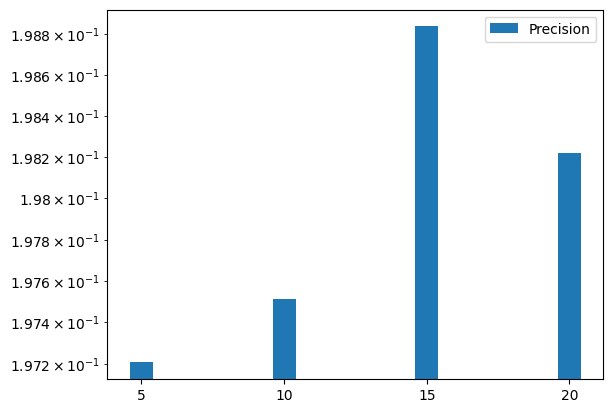

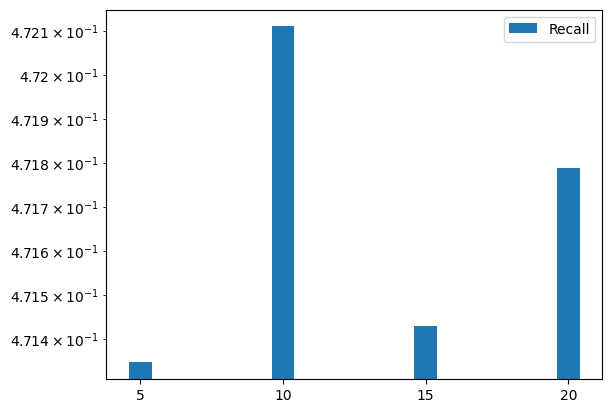

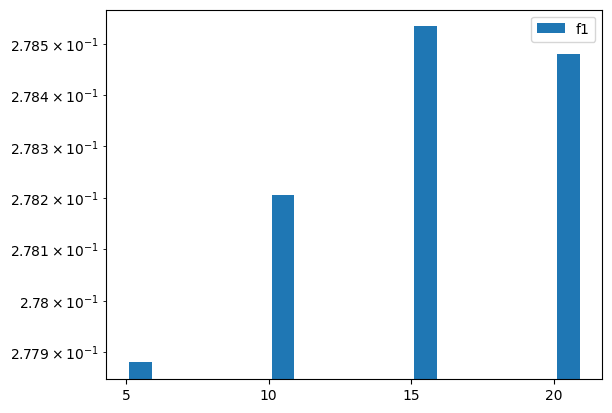

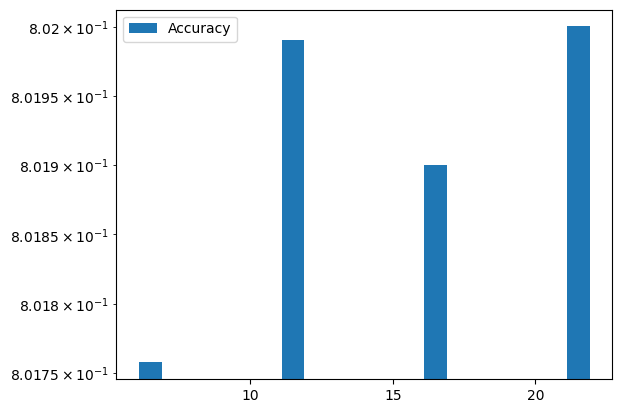

In [ ]:
plt.yscale("log")
#plt.ylim(bottom = 0.1)
xticks = [5,10,15,20]
plt.xticks(xticks)
plt.bar(x = [x for x in xticks], height = precision, label = "Precision")
plt.legend()
plt.show()

plt.yscale("log")
plt.xticks(xticks)
plt.bar(x = [x for x in xticks], height = recall, label = "Recall")
plt.legend()
plt.show()

plt.yscale("log")
plt.xticks(xticks)
plt.bar(x = [x+0.5 for x in xticks], height = f1, label = "f1")
plt.legend()
plt.show()

plt.yscale("log")
plt.xticks(xticks)
plt.bar(x = [x+1.5 for x in xticks], height = accuracy, label = "Accuracy")
plt.legend()
plt.show()

In [ ]:
nb.fit(X_train, y_train)

MultinomialNB()

In [ ]:
lp = nb.feature_log_prob_

**Analysis of Feature Importance:**

Feature Importance Predicted by Random Forest

In [ ]:
rfimp

array([0.01940335, 0.01412652, 0.01573404, 0.01892617, 0.02062032,
       0.01910048, 0.0155535 , 0.09524907, 0.12535457, 0.14287079,
       0.01607333, 0.0596722 , 0.09175285, 0.09463975, 0.08863686,
       0.00598981, 0.01567119, 0.00801647, 0.02017934, 0.00800784,
       0.00235415, 0.00064707, 0.00544117, 0.00288579, 0.00836358,
       0.00140056, 0.0014954 , 0.00206483, 0.00263712, 0.00329517,
       0.00401605, 0.00539165, 0.00697869, 0.00849701, 0.00938331,
       0.0106899 , 0.01172741, 0.01715267])

In [ ]:
impdf = pd.DataFrame()
impdf['feature'] = X.columns
impdf['importance'] = rfimp

In [ ]:
impdf.sort_values(by = 'importance', ascending = False)

,feature,importance
9,BMI,0.142871
8,Weight_(kg),0.125355
7,Height_(cm),0.095249
13,Green_Vegetables_Consumption,0.094640
12,Fruit_Consumption,0.091753
14,FriedPotato_Consumption,0.088637
11,Alcohol_Consumption,0.059672
4,Diabetes,0.020620
18,General_Health_Poor,0.020179
0,Exercise,0.019403


Feature Importance Predicted by Naive Bayes

In [ ]:
lp

array([[ -6.08244449,  -8.26105255,  -8.26644568,  -7.46740265,
         -7.7906008 ,  -7.03087064,  -6.59682608,  -0.70342595,
         -1.42024936,  -2.49121933,  -6.78260008,  -4.19268854,
         -2.44003731,  -3.11957465,  -3.99860367,  -7.48792756,
         -8.12632881,  -7.02877704,  -9.44212292,  -6.83006687,
         -8.91338617, -11.18969209,  -7.91176615,  -8.65806372,
         -6.11338479,  -8.56847397,  -8.76429607,  -8.5792163 ,
         -8.48131321,  -8.43809383,  -8.48019651,  -8.3201919 ,
         -8.22964831,  -8.11146222,  -8.10711281,  -8.20267619,
         -8.66372678,  -8.63442379],
       [ -6.29208291,  -7.5113617 ,  -7.50600883,  -7.24639327,
         -6.8331561 ,  -6.40375048,  -6.35042025,  -0.70460141,
         -1.38164844,  -2.46022924,  -6.38911381,  -4.45121009,
         -2.50965124,  -3.21463758,  -4.04548457,  -8.93683158,
         -7.14526798,  -6.90769428,  -7.79004484,  -7.49900894,
        -10.1819855 , -11.83309611,  -8.66842936,  -9.80550793,
   

In [ ]:
nbprobs = pd.DataFrame()

In [ ]:
nbprobs['feature'] = X.columns
nbprobs['0'] = lp[0]
nbprobs['1'] = lp[1]

In [ ]:
nbprobs.sort_values(by = '1', ascending = False)

,feature,0,1
7,Height_(cm),-0.703426,-0.704601
8,Weight_(kg),-1.420249,-1.381648
9,BMI,-2.491219,-2.460229
12,Fruit_Consumption,-2.440037,-2.509651
13,Green_Vegetables_Consumption,-3.119575,-3.214638
14,FriedPotato_Consumption,-3.998604,-4.045485
11,Alcohol_Consumption,-4.192689,-4.451210
24,Checkup_Within the past year,-6.113385,-5.946342
0,Exercise,-6.082444,-6.292083
6,Sex,-6.596826,-6.350420


The top ten most important features predicted by our Random Forest model include:

1.   BMI
2.   Weight_(kg)
3.   Height_(cm)
4.   Green Vegetables Consumption
5.   Fruit Consumption
6.   Fried Potato Consumption
7.   Alcohol Consumption
8.   Diabetes
9.   General Health (poor)
10.   Exercise

The top ten most important features predicted by our Naive Bayes model include:

1.   Height_(cm)
2.   Weight_(kg)
3.   BMI
4.   Fruit Consumption
5.   Green Vegetables Consumption
6.   Fried Potato Consumption
7.   Alcohol Consumption
8.   Checkup (within the past year)
9.   Exercise
10.   Sex

As we can clearly see from the results from both models, Height, weight, BMI; Fruit, Green Vegetable, Fried Potato, Alcohol Consumption; and Exercise, are all features predicted by both models to being the greatest contributors to having risk for heart disease while diabetes, general health, checkup frequency, and sex are other important contributing factors. For the feature importances predicted by Naive Bayes, it is important to note that we used feature log probabilities, which is basically the feature importance predicted by Naive Bayes. When it comes to feature log probabilities, the closer a probability is to one, the higher the log is, which results in higher importance (the higher the number, the more important). Also for Naive Bayes, the '0' column indicates the class that doesn't have heart disease and the '1' column indicates the class that does have heart disease; in our output shown above, the top ten is sorted according to the '1' class, which is those who do have heart disease (i.e. what the model deemed to be the most important features for predicting heart disease instead of not heart disease).

Our feature importance results predicted by our models is plausible. First, BMI being a top contributor to predicting heart disease is one of the well known medical causes of heart disease since those with higher BMIs tend to have a higher risk for cardiovascular diseases (CVDs). Although we are not too sure about how height and weight directly contribute to heart disease risk, since height and weight are involved in calculating BMI, it makes sense to assume that height, weight, and BMI collectively play a contributing role. Second, our models also predicted certain kinds of food consumption to play an important contributing factor to heart disease risk. Lifestyle choices when it comes to food consumption is another common contributing factor to CVDs, so these findings are well predicted by our models as well. Third, other factors such as exercise frequency, checkup frequency, general health, diabetes, and even sex are well known contributing causes to CVDs. All of the factors predicted by our models directly impact an individual's lifestyle choices, which can thus increase or decrease their risk for CVDs.

In the research paper published along with this dataset, the researchers performed a logistic regression as well as four other machine learning models. Their logistic regression model gave the best F1 score. The researchers built upon their logistic regression model by tuning up their hyperparameters, and found that Sex, Diabetes, and General Health were the top most contributing factors to heart disease risk. We did not have the time, resources, bandwidth, or scope to go as deep as the researchers, but if we did happend to tune the hyperparameters and tune our models to maximum performance, we may have gotten different results. However, the feature importance that we predicted do, in fact, align with those of the researchers since we also predicted Sex, Diabetes, and General Health to be significant factors.

## Evaluation

KNN

In [ ]:
knresdf

,fit_time,score_time,test_precision,test_recall,test_f1,test_accuracy
0,"[0.1590418815612793, 0.13961291313171387, 0.14...","[58.28868532180786, 61.15336084365845, 58.1331...","[0.18232044198895028, 0.2215909090909091, 0.19...","[0.013215859030837005, 0.015618742490989187, 0...","[0.024645257654966394, 0.029180695847362513, 0...","[0.9154309395842777, 0.9159813507738134, 0.915..."
1,"[0.14502978324890137, 0.19968914985656738, 0.1...","[76.2801513671875, 80.5603518486023, 79.379000...","[0.0, 0.5, 0.6666666666666666, 0.3333333333333...","[0.0, 0.00040048057669203043, 0.00160192230676...","[0.0, 0.0008003201280512204, 0.003196164602477...","[0.9190571780094541, 0.9191543093958428, 0.919..."
2,"[0.13793706893920898, 0.14387035369873047, 0.1...","[80.3075098991394, 76.13966464996338, 72.77245...","[0.0, 0.0, 1.0, 0.6, 0.0, 1.0, 1.0, 0.66666666...","[0.0, 0.0, 0.0008009611533840609, 0.0012009607...","[0.0, 0.0, 0.0016006402561024409, 0.0023971234...","[0.9190895551382503, 0.9191219322670465, 0.919..."
3,"[0.14335966110229492, 0.14502644538879395, 0.2...","[68.57816767692566, 66.72301936149597, 70.7134...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.9191543093958428, 0.9191543093958428, 0.919..."
4,"[0.135420560836792, 0.2024097442626953, 0.2098...","[71.12220215797424, 69.03883123397827, 69.4477...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.9191543093958428, 0.9191543093958428, 0.919..."
5,"[0.1486678123474121, 0.21346306800842285, 0.19...","[72.2746033668518, 70.86983895301819, 78.15308...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.9191543093958428, 0.9191543093958428, 0.919..."


In [ ]:
meanknres

,num_neighbors,Precision,Recall,f1,Accuracy
0,5,0.174976,0.013135,0.024428,0.915206
1,10,0.375000,0.000761,0.001518,0.919111
2,15,0.486667,0.000561,0.001120,0.919162
3,20,0.000000,0.000000,0.000000,0.919146
4,25,0.000000,0.000000,0.000000,0.919146
5,30,0.000000,0.000000,0.000000,0.919150


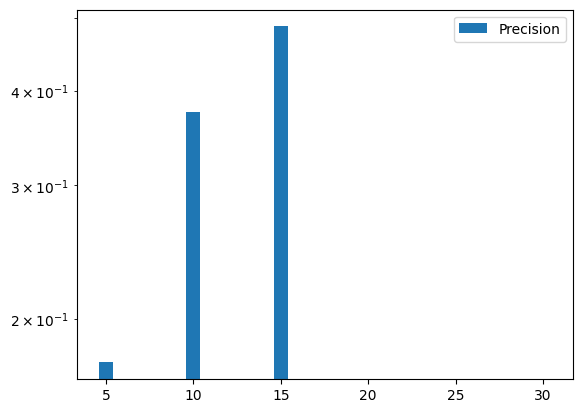

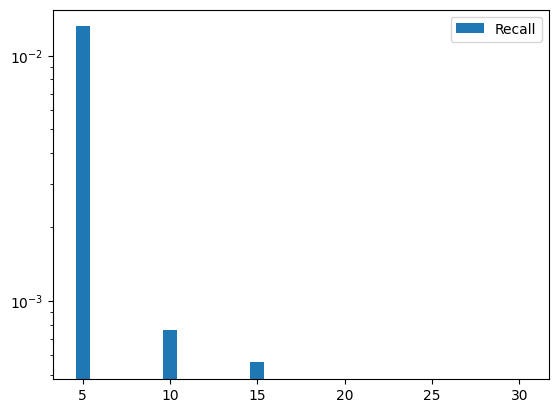

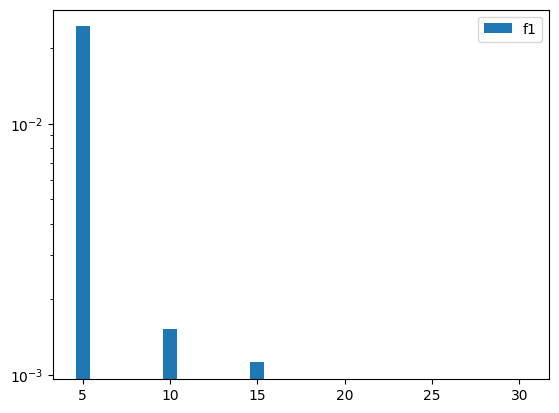

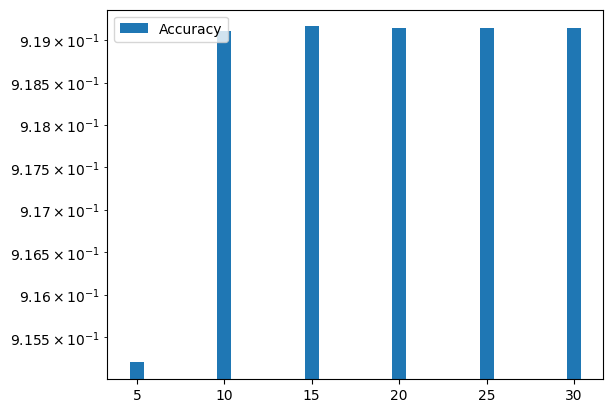

In [ ]:
plt.yscale("log")
#plt.ylim(bottom = 0.1)
xticks = [5,10,15,20, 25, 30]
plt.xticks(xticks)
plt.bar(x = [x for x in xticks], height = knp, label = "Precision")
plt.legend()
plt.show()

plt.yscale("log")
plt.xticks(xticks)
plt.bar(x = [x for x in xticks], height = knr, label = "Recall")
plt.legend()
plt.show()

plt.yscale("log")
plt.xticks(xticks)
plt.bar(x = [x for x in xticks], height = knf1, label = "f1")
plt.legend()
plt.show()

plt.yscale("log")
plt.xticks(xticks)
plt.bar(x = [x for x in xticks], height = knacc, label = "Accuracy")
plt.legend()
plt.show()

Random Forest

In [ ]:
meanrfres

,Precision,Recall,f1,Accuracy,num_folds
0,0.432149,0.042569,0.077477,0.918071,5
1,0.443688,0.043811,0.079734,0.918246,10
2,0.440718,0.045332,0.082045,0.918113,15
3,0.441918,0.045132,0.081760,0.918143,20


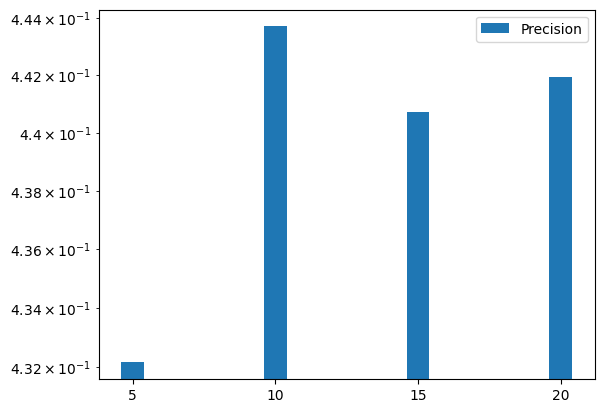

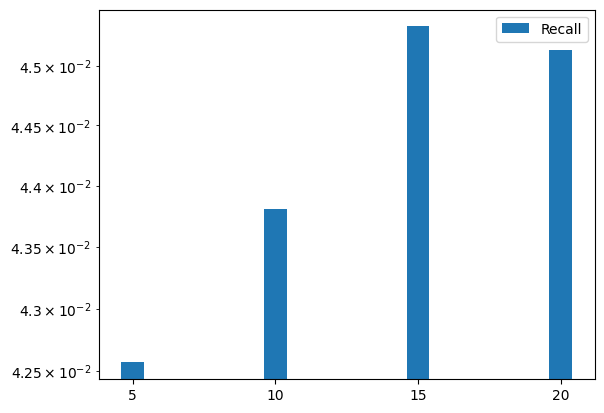

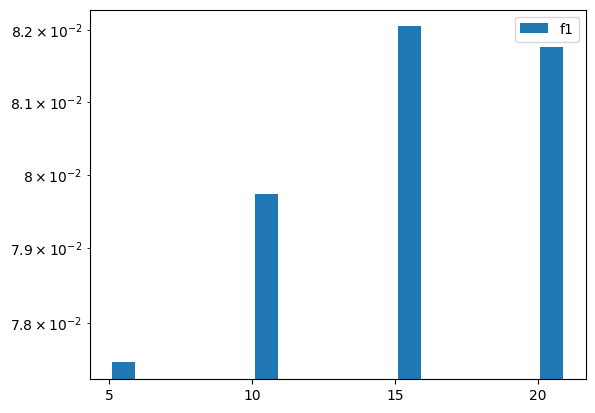

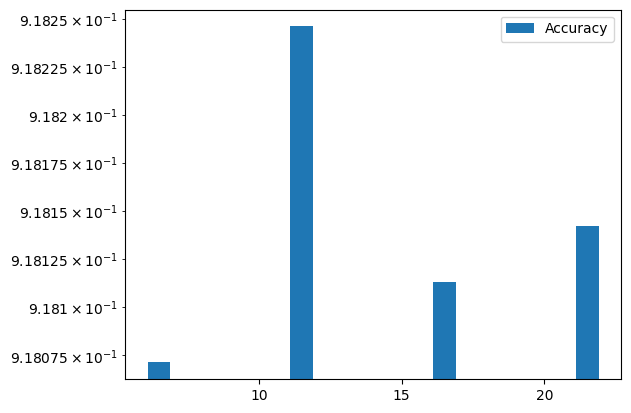

In [ ]:
plt.yscale("log")
#plt.ylim(bottom = 0.1)
xticks = [5,10,15,20]
plt.xticks(xticks)
plt.bar(x = [x for x in xticks], height = rfp, label = "Precision")
plt.legend()
plt.show()

plt.yscale("log")
plt.xticks(xticks)
plt.bar(x = [x for x in xticks], height = rfr, label = "Recall")
plt.legend()
plt.show()

plt.yscale("log")
plt.xticks(xticks)
plt.bar(x = [x+0.5 for x in xticks], height = rff1, label = "f1")
plt.legend()
plt.show()

plt.yscale("log")
plt.xticks(xticks)
plt.bar(x = [x+1.5 for x in xticks], height = rfacc, label = "Accuracy")
plt.legend()
plt.show()

Naive Bayes

In [ ]:
meannbres

,Precision,Recall,f1,Accuracy,num_folds
0,0.197206,0.471347,0.277879,0.801757,5
1,0.197510,0.472109,0.278205,0.801991,10
2,0.198835,0.471428,0.278534,0.801900,15
3,0.198219,0.471789,0.278480,0.802000,20


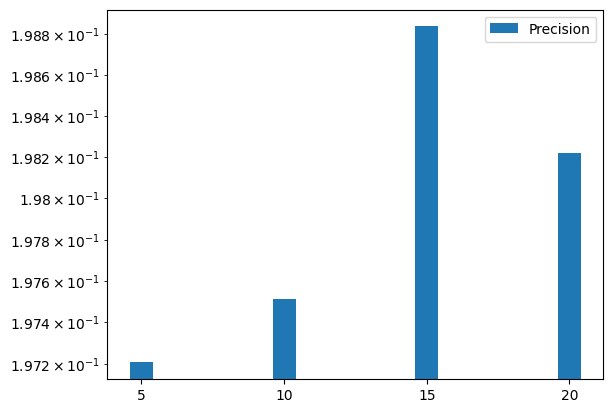

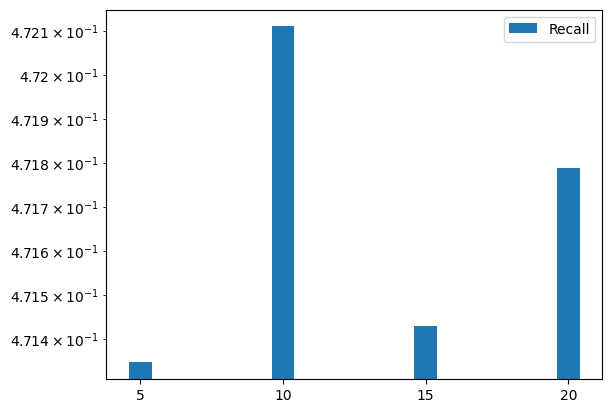

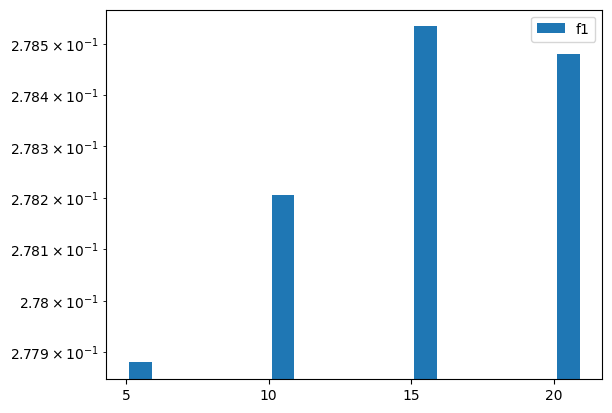

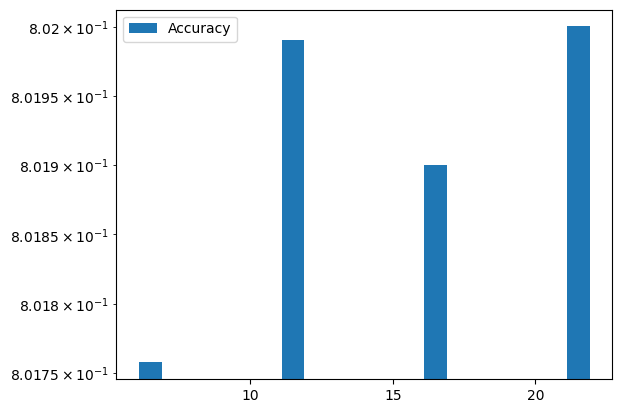

In [ ]:
plt.yscale("log")
#plt.ylim(bottom = 0.1)
xticks = [5,10,15,20]
plt.xticks(xticks)
plt.bar(x = [x for x in xticks], height = precision, label = "Precision")
plt.legend()
plt.show()

plt.yscale("log")
plt.xticks(xticks)
plt.bar(x = [x for x in xticks], height = recall, label = "Recall")
plt.legend()
plt.show()

plt.yscale("log")
plt.xticks(xticks)
plt.bar(x = [x+0.5 for x in xticks], height = f1, label = "f1")
plt.legend()
plt.show()

plt.yscale("log")
plt.xticks(xticks)
plt.bar(x = [x+1.5 for x in xticks], height = accuracy, label = "Accuracy")
plt.legend()
plt.show()

**KNN Analysis**



*   We ran KNN on 10-Fold cross validation using 5, 10, 15, 20, 25, and 30 neighbors. Running KNN with different folds proved to be too time costly.
*   One of the important things to note is that performance seems to drop off between 5 to 10 neighbors, and it seems that the perfect number of neighbors appears to be between 5 and 10 for the best performance.
*   Generally, as the number of neighbors increases, precision increases, but recall remains very low; however, it is important to note that precision falls off significantly after 15 neighbors and recall continuously falls off as well.
*   F1-score drops to zero after 15 neighbors.
*   It appears the model is severely overfit, with how everything except accuracy drops off after a certain point.
*   High accuracy throughout all neighbors indicates possible class imbalances when the model's precision and recall fall to 0. When precision and recall are zero, the model is not predicting any positive cases (there are a high number of negatives compared to the number of positives in the dataset), so there is a much higher proportion of those without heart disease.
*   Our finding is that the model's performance is generally poor, especially as the number of neighbors increases, which somewhat supports the fact of how simpler methods can yield better results.
*   When comparing our KNN results to the research paper's KNN results, we can see that our KNN model has a significantly lower F1-score compared to the research paper's F1-score.

**Random Forest Analysis**

*   We tested our Random Forest model with 5-Fold, 10-Fold, 15-Fold, and 20-Fold Cross Validation.
*   Looking at the metrics for different numbers of folds, it seems that the precision, recall, F1-score, and accuracy values are relatively consistent across the different folds, which suggests that the model's performance is not significantly impacted by the number of folds used in cross-validation.
*   Our Random Forest model's precision value indicates that when the model predicts a positive instance, it's correct about 43.2% to 44.4% of the time
*   Recall for our Random Forest model is quite low, ranging from 0.042569 to 0.045332. This suggests that the model is capturing only a small fraction of the actual positive instances in the dataset.
*   The accuracy score for our Random Forest model is consistently around 0.918, which means the model is accurately predicting outcomes for around 91.8% of instances in the dataset.
*   The F1-score values range from 0.0775 to 0.082, indicating a moderate balance between precision and recall.
*   Our model achieves relatively high accuracy, but the precision, recall, and F1-score values are relatively low.
*   Our model is performing well in terms of making correct overall predictions, but it struggles to correctly identify positive instances (low recall) and its positive predictions are not very accurate (moderate precision).
*   When comparing our Random Forest results to the research paper's Random Forest results, we can see that our Random Forest model has a lower F1-score compared to the research paper's F1-score.
*   Our Random Forest model has an F1-score of approximately 0.080, whereas the research paper's model has an F1-score of around 0.178.





**Naive Bayes Analysis**

*   We tested our Naive Bayes model with 5-Fold, 10-Fold, 15-Fold, and 20-Fold Cross Validation.
*   Looking at the metrics for different numbers of folds, it seems that the precision, recall, F1-score, and accuracy values are relatively consistent across the different folds, which suggests that the model's performance is not significantly impacted by the number of folds used in cross-validation.
*   The performance metrics themselves seem reasonable, with precision values around 0.2, recall values around 0.47, and F1-scores around 0.28.
*   Naive Bayes accuracy of 0.80 is less than the accuracy of KNN (0.92) and Random Forest (0.92), but is a decent accuracy score considering the model's predictions were accurate for 80% of the cases.
*   When comparing our Naive Bayes results to the research paper's Naive Bayes results, we can see that our Naive Bayes model actually outperforms the model in the research paper in terms of F1-score.
*   Our Naive Bayes model has an F1-score of around 0.28, whereas the research paper's model has an F1-score of around 0.27, so these two models are actually quite close in terms of F1-score.





**Research Article's Model Performance:**

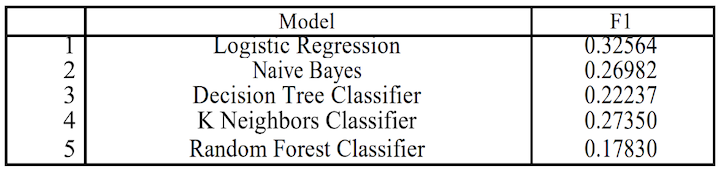

**Model Comparison**

In terms of F1-score, our Naive Bayes model was the best, Random Forest came second, and our KNN placed last. In terms of sheer accuracy, our KNN just barely beats out the Random Forest, and the Naive Bayes falls short.

We believe this indicates that the Naive Bayes is better at generalizing. Essentially, the Random Forest and KNN may be overfit. The higher recall of the Naive Bayes corroborates this. Recall is the number of true positives divided by the total number of ground truth positives (true positives + false negatives). Essentially, how many positives in the training set were correctly predicted. Precision, on the other hand, is the number of true positives divided by the total number of positive predictions(true positives + false positives). Thus, if a model is not predicting positives at all, precision will run the risk of leading to a Divide By Zero Error, which is what we faced with the KNN at higher numbers of neighbors.

The Random Forest and KNN both have very low recalls, but the Naive Bayes has a higher recall of roughly 0.47 across each iteration. Thus, of the actual positives in the dataset, Naive Bayes was the best at accurately predicting them.

The low recall of our KNN and Random Forest means that both models gave very low numbers of positive predictions, something which is more apparent with the KNN than the Random Forest. This indicates that they are overfit to the training dataset, and as such are more influenced by the class imbalances than the Naive Bayes was.

Thus, by not suffering from overfitting, the Naive Bayes has an advantage over KNN and Random Forest.

There is a downside to this, however. The lower precision and the lower accuracy of Naive Bayes show that the model made more incorrect predictions(especially false positives) than the other two models.

**ANOVA**

Despite F1 being the harmonic mean of precision and recall, we chose to treat it as arithmetic mean in our hypothesis test for simplicity.

Null Hypothesis: There is no significant difference in the mean F1-scores between KNN at 10 folds, Random Forest at 10 folds, and Naive Bayes at 10 folds.

Alternative Hypothesis: There is a significant difference in the mean F1 scores between at least one pair of the three models.

Significance Level: 95%; alpha: 0.05

In [ ]:
import scipy.stats as stats

#F1 scores for each model
knn_f1_scores = [0.024428, 0.001518, 0.001120]
rf_f1_scores = [0.078128]
nb_f1_scores = [0.278205]

#Perform ANOVA
f_statistic, p_value = stats.f_oneway(knn_f1_scores, rf_f1_scores, nb_f1_scores)

print("F-statistic:", f_statistic)
print("p-value:", p_value)

F-statistic: 152.61942741940604
p-value: 0.0065095933294285575


In [ ]:
if p_value < 0.05:
    print("ANOVA result is significant. There are differences among the models.")
else:
    print("ANOVA result is not significant. There are no significant differences among the models.")

ANOVA result is significant. There are differences among the models.


Results of ANOVA:

To determine if there is a significant difference between the F1-scores of K-Nearest Neighbors (KNN) at 10 folds and the F1-scores of Random Forest and Naive Bayes, we ran an ANOVA with KNN at 10 folds to single F1-scores for Random Forest and Naive Bayes at 10 folds.

The p-value of 0.0065 is less than the alpha of 0.05. Therefore, we reject the null hypothesis and conclude that there is a significant difference in the mean F1 scores between at least one of the models and the others.



**Advantages and Limitations**

**KNN**

*Advantages*

*   Can handle both binary and multiclass classification tasks
*   Simple algorithm that does not need assumptions about the data distribution

*Limitations*

*   Time costly with a large number of neighbors
*   Sensitive to the choice of distance metric and the number of neighbors
*   Questionable with high-dimensional data

**Random Forest**

*Advantages*

*   Can handle a mix of categorical and numerical variables
*   Aggregates multiple decision trees to improve generalization
*   Works well for both classification and regression tasks

*Limitations*

*   May not perform as well on tasks with a small number of data
*   Different decision trees each run unless ran with a seed

**Naive Bayes**

*Advantages*

*   Time efficient and can handle many variables
*   Can use for both binary and multiclass classification problems

*Limitations*

*   Requires features to be independent
*   "Zero-frequency problem"














## Additional Work: Neural Network

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
import tensorflow as tf

In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(38, input_shape = (38,), activation = 'relu'),
    tf.keras.layers.Dense(1, activation = 'sigmoid')
])

In [ ]:
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy', tf.keras.metrics.Precision(), tf.keras.metrics.Recall()])

In [ ]:
model.fit(X_train, y_train, epochs = 10)

Epoch 1/10
7239/7239 [==============================] - 17s 2ms/step - loss: 0.2929 - accuracy: 0.9135 - precision: 0.3460 - recall: 0.0815
Epoch 2/10
7239/7239 [==============================] - 15s 2ms/step - loss: 0.2351 - accuracy: 0.9168 - precision: 0.4239 - recall: 0.0878
Epoch 3/10
7239/7239 [==============================] - 15s 2ms/step - loss: 0.2322 - accuracy: 0.9172 - precision: 0.4290 - recall: 0.0784
Epoch 4/10
7239/7239 [==============================] - 16s 2ms/step - loss: 0.2295 - accuracy: 0.9177 - precision: 0.4372 - recall: 0.0693
Epoch 5/10
7239/7239 [==============================] - 15s 2ms/step - loss: 0.2281 - accuracy: 0.9186 - precision: 0.4665 - recall: 0.0663
Epoch 6/10
7239/7239 [==============================] - 17s 2ms/step - loss: 0.2267 - accuracy: 0.9187 - precision: 0.4705 - recall: 0.0627
Epoch 7/10
7239/7239 [==============================] - 17s 2ms/step - loss: 0.2258 - accuracy: 0.9188 - precision: 0.4746 - recall: 0.0565
Epoch 8/10
7239/7239

In [ ]:
model.evaluate(X_test, y_test)

2413/2413 [==============================] - 9s 4ms/step - loss: 0.2232 - accuracy: 0.9188 - precision: 0.5169 - recall: 0.0293


[0.22318364679813385,
 0.9187841415405273,
 0.516853928565979,
 0.0292853731662035]

**Neural Network Analysis**

One of the extra things we decided to explore was a neural network.

A neural network is a type of deep learning model designed to function similarly to real neurons. Here, we have created a simple two layer fully connected Sequential model. The input layer has 38 neurons and an input shape of (38), one for each input feature. For simplicity's sake we chose the ReLU activation, effectively the default activation function used in neural networks, for the first layer. To get the probability of CVD, the second layer has just 1 neuron and uses the sigmoid as its activation function.

The model also uses the Adam optimizer with binary cross entropy as its loss function. To evaluate, we measure its accuracy, Precision, and Recall across each epoch. An epoch is a pass through the entire dataset. For the sake of time, we did not use cross validation on the neural net. Due to issues with using the TensorFlow API, we were unable to calculate F1-score. After manually calculating F1-score on the test set, we came up with a result of 0.05545649945, which is the lowest F1-score of any model.

When comparing the evaluation metrics of the network to our other models, while the numbers are not similar they do follow similar patterns. Our Random Forest and KNN (before the severe drop-off in performance) both have middling precision, low recall, and high accuracy. Our Naive Bayes does not follow this pattern, but this rudimentary neural network does.




